#### GLOBAL TERRORISM - CSSM-502 ADVANCED DATA ANALYSIS with PYTHON PROJECT

#### Data Dictionary

#### Importing Libraries & Packages

In [1]:
import numpy as np  
import pandas as pd 
from pandas import DataFrame
import os, sys, operator, warnings
import scipy.stats as stats
import matplotlib.pyplot as plt
from chart_studio import plotly
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
import plotly.express as px
from scipy import signal
import plotly.graph_objects as go
import re
# Data prepping
from sklearn import preprocessing
# Prediction
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# Classifiers
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
import itertools
from sklearn.dummy import DummyClassifier # Validation
from sklearn.model_selection import KFold
from subprocess import check_output

#### Reading the Data

In [2]:
data1 = pd.read_csv('C:/Users/selin/Desktop/globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", low_memory=False)

In [3]:
data1.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

#### Cleaning the Data / Pre-processing

In [4]:
# Column list of the original data - 135 columns
list(data1.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
# We see the sum of missing values for each column in the data
data1.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
data1.shape

(181691, 135)

In [7]:
# We keep only columns where 60% or more valid data is available (so eliminate rows filled with too many missing values/NaNs)
data2 = data1.dropna(how='any',axis=1,thresh=data1.shape[0]*0.6)

In [8]:
# We see the sum of missing values for each column in the data after the threshold we applied
data2.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

In [9]:
data2.shape

(181691, 58)

In [10]:
data2.head()
# from 135 columns, now it has decreased to 58 columns after we removed the columns with a large number of missing values. 

eventid  iyear  imonth  iday  extended  country         country_txt  \
0  197000000001   1970       7     2         0       58  Dominican Republic   
1  197000000002   1970       0     0         0      130              Mexico   
2  197001000001   1970       1     0         0      160         Philippines   
3  197001000002   1970       1     0         0       78              Greece   
4  197001000003   1970       1     0         0      101               Japan   

   region                   region_txt provstate  ... nwoundus  nwoundte  \
0       2  Central America & Caribbean       NaN  ...      NaN       NaN   
1       1                North America   Federal  ...      NaN       NaN   
2       5               Southeast Asia    Tarlac  ...      NaN       NaN   
3       8               Western Europe    Attica  ...      NaN       NaN   
4       4                    East Asia   Fukouka  ...      NaN       NaN   

   property  ishostkid  scite1 dbsource  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  
0         0        0.0     NaN     PGIS        0         0         0        0  
1         0        1.0     NaN     PGIS        0         1         1        1  
2         0        0.0     NaN     PGIS       -9        -9         1        1  
3         1        0.0     NaN     PGIS       -9        -9         1        1  
4         1        0.0     NaN     PGIS       -9        -9         1        1  

[5 rows x 58 columns]

In [11]:
# Column list of the data2 (data after the columns with over-missing values are eliminated (%60 with valid data preserved) - 58 columns)
list(data2.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [12]:
# We select out of these variables the variables which we though that could be meaningful for our analysis.

In [13]:
# Renaming the variables 
data2.rename(columns ={'eventid': 'ID','iyear':'Year','imonth':'Month','iday':'Day',
                       'country_txt':'Country', 'region_txt':'Region','provstate':'State','city':'City','success':'Success',
                       'attacktype1_txt':'Attack_Type','targtype1_txt':'Target', 'weaptype1_txt':'Weapon_Type', 
                       'natlty1_txt': 'Nationality_Victim','gname':'Group_Name', 'latitude': 'Latitude','longitude': 'Longitude',
                       'nkill':'Number_of_Killed', 'nwound': 'Number_of_Wounded', 'suicide': 'Suicides',
                       'extended': 'More_Than_24_Hours', 'vicinity': 'Vicinity', 'crit1': 'Criteria_1', 'crit2':'Criteria_2', 
                       'crit3':'Criteria_3', 'doubtterr': 'Doubts', 'multiple':'Any_Connection', 'guncertain1': 'Confirmation_of_Group', 
                       'claimed': 'Claimed_by_Group', 'property': 'Property_Damage', 'ishostkid':'Hostage_or_Kidnap', 
                       'target1': 'Specific_Target', 'summary':'Summary'
                      },inplace=True);
pd.set_option('display.max_columns', None)

data2

C:\Users\selin\AppData\Local\Temp\ipykernel_412\3548199713.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  Year  Month  Day  More_Than_24_Hours  country  \
0       197000000001  1970      7    2                   0       58   
1       197000000002  1970      0    0                   0      130   
2       197001000001  1970      1    0                   0      160   
3       197001000002  1970      1    0                   0       78   
4       197001000003  1970      1    0                   0      101   
...              ...   ...    ...  ...                 ...      ...   
181686  201712310022  2017     12   31                   0      182   
181687  201712310029  2017     12   31                   0      200   
181688  201712310030  2017     12   31                   0      160   
181689  201712310031  2017     12   31                   0       92   
181690  201712310032  2017     12   31                   0      160   

                   Country  region                       Region  \
0       Dominican Republic       2  Central America & Caribbean   
1                   Mexico       1                North America   
2              Philippines       5               Southeast Asia   
3                   Greece       8               Western Europe   
4                    Japan       4                    East Asia   
...                    ...     ...                          ...   
181686             Somalia      11           Sub-Saharan Africa   
181687               Syria      10   Middle East & North Africa   
181688         Philippines       5               Southeast Asia   
181689               India       6                   South Asia   
181690         Philippines       5               Southeast Asia   

                  State           City   Latitude   Longitude  specificity  \
0                   NaN  Santo Domingo  18.456792  -69.951164          1.0   
1               Federal    Mexico city  19.371887  -99.086624          1.0   
2                Tarlac        Unknown  15.478598  120.599741          4.0   
3                Attica         Athens  37.997490   23.762728          1.0   
4               Fukouka        Fukouka  33.580412  130.396361          1.0   
...                 ...            ...        ...         ...          ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034          2.0   
181687         Lattakia         Jableh  35.407278   35.942679          1.0   
181688      Maguindanao       Kubentog   6.900742  124.437908          2.0   
181689          Manipur         Imphal  24.798346   93.940430          1.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966          1.0   

        Vicinity                                            Summary  \
0              0                                                NaN   
1              0                                                NaN   
2              0                                                NaN   
3              0                                                NaN   
4              0                                                NaN   
...          ...                                                ...   
181686         0  12/31/2017: Assailants opened fire on a Somali...   
181687         1  12/31/2017: Assailants launched mortars at the...   
181688         0  12/31/2017: Assailants set fire to houses in K...   
181689         0  12/31/2017: Assailants threw a grenade at a Fo...   
181690         0  12/31/2017: An explosive device was discovered...   

        Criteria_1  Criteria_2  Criteria_3  Doubts  Any_Connection  Success  \
0                1           1           1     0.0             0.0        1   
1                1           1           1     0.0             0.0        1   
2                1           1           1     0.0             0.0        1   
3                1           1           1     0.0             0.0        1   
4                1           1           1    -9.0             0.0        1   
...            ...         ...         ...     ...             ...      ...   
181686           

In [14]:
# Taking the relevant variables
data3=data2[['ID','Year','Month','Day','Country','Region','State','City','Success','Attack_Type','Target', 'Specific_Target',
             'Weapon_Type', 'Nationality_Victim','Group_Name','Latitude','Longitude', 'Number_of_Killed','Number_of_Wounded','Suicides',
            'More_Than_24_Hours', 'Vicinity', 'Criteria_1','Criteria_2','Criteria_3', 'Doubts', 'Confirmation_of_Group', 'Claimed_by_Group',
            'Any_Connection', 'Property_Damage', 'Hostage_or_Kidnap', 'Summary'
            ]]

# Data after we take and rename the columns we see relevant with our study - 32 columns
data3

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  Dominican Republic   
1       197000000002  1970      0    0              Mexico   
2       197001000001  1970      1    0         Philippines   
3       197001000002  1970      1    0              Greece   
4       197001000003  1970      1    0               Japan   
...              ...   ...    ...  ...                 ...   
181686  201712310022  2017     12   31             Somalia   
181687  201712310029  2017     12   31               Syria   
181688  201712310030  2017     12   31         Philippines   
181689  201712310031  2017     12   31               India   
181690  201712310032  2017     12   31         Philippines   

                             Region            State           City  Success  \
0       Central America & Caribbean              NaN  Santo Domingo        1   
1                     North America          Federal    Mexico city        1   
2                    Southeast Asia           Tarlac        Unknown        1   
3                    Western Europe           Attica         Athens        1   
4                         East Asia          Fukouka        Fukouka        1   
...                             ...              ...            ...      ...   
181686           Sub-Saharan Africa  Middle Shebelle  Ceelka Geelow        1   
181687   Middle East & North Africa         Lattakia         Jableh        1   
181688               Southeast Asia      Maguindanao       Kubentog        1   
181689                   South Asia          Manipur         Imphal        0   
181690               Southeast Asia      Maguindanao  Cotabato City        0   

                           Attack_Type                       Target  \
0                        Assassination  Private Citizens & Property   
1          Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                        Assassination          Journalists & Media   
3                    Bombing/Explosion      Government (Diplomatic)   
4       Facility/Infrastructure Attack      Government (Diplomatic)   
...                                ...                          ...   
181686                   Armed Assault                     Military   
181687               Bombing/Explosion                     Military   
181688  Facility/Infrastructure Attack  Private Citizens & Property   
181689               Bombing/Explosion         Government (General)   
181690               Bombing/Explosion                      Unknown   

                Specific_Target Weapon_Type  Nationality_Victim  \
0                  Julio Guzman     Unknown  Dominican Republic   
1       Nadine Chaval, daughter     Unknown             Belgium   
2                      Employee     Unknown       United States   
3                  U.S. Embassy  Explosives       United States   
4                U.S. Consulate  Incendiary       United States   
...                         ...         ...                 ...   
181686               Checkpoint    Firearms             Somalia   
181687         Hmeymim Air Base  Explosives              Russia   
181688                   Houses  Incendiary         Philippines   
181689                   Office  Explosives               India   
181690                  Unknown  Explosives         Philippines   

                                        Group_Name   Latitude   Longitude  \
0                                           MANO-D  18.456792  -69.951164   
1               23rd of September Communist League  19.371887  -99.086624   
2                                          Unknown  15.478598  120.599741   
3                                          Unknown  37.997490   23.762728   
4                                          Unknown  33.580412  130.396361   
...                                            ...        ...         ...   
181686                                  Al-Shabaab   2.359673   45.385034   
181687                           Musli

In [15]:
# First, to avoid confusion, we restrict the dataset to only attacks that were of terrorist nature
data4 = data3[(data3.Criteria_1 == 1) & (data3.Criteria_2 == 1) & (data3.Criteria_3 == 1) & (data3.Doubts == 0)]

# Data after we take only the attacks that were of terrorist nature - 32 columns * 138.879 rows
# So, number of rows has decreased from 181.691 to 138.879 

# Thus, set the new indexes
data4=data4.reset_index(drop=True)

data4

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  Dominican Republic   
1       197000000002  1970      0    0              Mexico   
2       197001000001  1970      1    0         Philippines   
3       197001000002  1970      1    0              Greece   
4       197001010002  1970      1    1       United States   
...              ...   ...    ...  ...                 ...   
138874  201712310019  2017     12   31               India   
138875  201712310020  2017     12   31         Afghanistan   
138876  201712310030  2017     12   31         Philippines   
138877  201712310031  2017     12   31               India   
138878  201712310032  2017     12   31         Philippines   

                             Region        State           City  Success  \
0       Central America & Caribbean          NaN  Santo Domingo        1   
1                     North America      Federal    Mexico city        1   
2                    Southeast Asia       Tarlac        Unknown        1   
3                    Western Europe       Attica         Athens        1   
4                     North America     Illinois          Cairo        1   
...                             ...          ...            ...      ...   
138874                   South Asia        Assam        Hungrum        1   
138875                   South Asia       Faryab        Maymana        1   
138876               Southeast Asia  Maguindanao       Kubentog        1   
138877                   South Asia      Manipur         Imphal        0   
138878               Southeast Asia  Maguindanao  Cotabato City        0   

                           Attack_Type                       Target  \
0                        Assassination  Private Citizens & Property   
1          Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                        Assassination          Journalists & Media   
3                    Bombing/Explosion      Government (Diplomatic)   
4                        Armed Assault                       Police   
...                                ...                          ...   
138874     Hostage Taking (Kidnapping)         Government (General)   
138875               Bombing/Explosion                     Business   
138876  Facility/Infrastructure Attack  Private Citizens & Property   
138877               Bombing/Explosion         Government (General)   
138878               Bombing/Explosion                      Unknown   

                                          Specific_Target Weapon_Type  \
0                                            Julio Guzman     Unknown   
1                                 Nadine Chaval, daughter     Unknown   
2                                                Employee     Unknown   
3                                            U.S. Embassy  Explosives   
4                               Cairo Police Headquarters    Firearms   
...                                                   ...         ...   
138874  Personal Security Officer of Council Member Ih...    Firearms   
138875                                       Jewelry Shop  Explosives   
138876                                             Houses  Incendiary   
138877                                             Office  Explosives   
138878                                            Unknown  Explosives   

        Nationality_Victim                                  Group_Name  \
0       Dominican Republic                                      MANO-D   
1                  Belgium          23rd of September Communist League   
2            United States                                     Unknown   
3            United States                                     Unknown   
4            United States                          Black Nationalists   
...                    ...                                         ...   
138874               India                    Zeliangrong United Front   
138875         Afghanistan            

In [16]:
# We analyze the unique values of some columns we want to discover to be sure about their values

column_values1 = data4[['Country']].values
unique_column_values1 = np.unique(column_values1)
print(unique_column_values1)

column_values2 = data4[['Attack_Type','Weapon_Type']].values
unique_column_values2 = np.unique(column_values2)
print(unique_column_values2)

column_values3 = data4[['Group_Name']].values
unique_column_values3 = np.unique(column_values3)
print(unique_column_values3)

column_values4 = data4[['Success', 'More_Than_24_Hours', 'Vicinity', 'Confirmation_of_Group', 'Claimed_by_Group',
            'Any_Connection', 'Property_Damage', 'Hostage_or_Kidnap' ,'Suicides']].values
unique_column_values4 = np.unique(column_values4)
print(unique_column_values4)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia-Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Czechoslovakia'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Germany (GDR)' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'International' 'Iran' 'Iraq' 'Irel

In [17]:
# As we can see there is some invalid values in some columns so we will pre-process

# In Weapon_Type column, there is one category whose name is too long so we shorten it 'Vehicle (not to include vehicle-borne 
# explosives, i.e., car or truck bombs)'
data4.Weapon_Type.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

# Fill the missing categorical values with 'Unknown' 
data4.Specific_Target = data4.Specific_Target.fillna('Unknown')
data4.Nationality_Victim = data4.Nationality_Victim.fillna('Unknown')
data4.Summary = data4.Summary.fillna('Unknown')
data4.State = data4.State.fillna('Unknown')

# Fill the missing numerical values with medians
data4.Number_of_Killed = np.round(data4.Number_of_Killed.fillna(data4.Number_of_Killed.median())).astype(int) 
data4.Number_of_Wounded = np.round(data4.Number_of_Wounded.fillna(data4.Number_of_Wounded.median())).astype(int) 
data4.Latitude = np.round(data4.Latitude.fillna(data4.Latitude.median())).astype(int)
data4.Longitude = np.round(data4.Longitude.fillna(data4.Longitude.median())).astype(int)

# We replace the missing values with '0' for binary variables such as 'Claimed_by_Group','Hostage_or_Kidnap', 'Any_Connection'
data4.Claimed_by_Group = data4.Claimed_by_Group.fillna(0) 
data4.Confirmation_of_Group = data4.Claimed_by_Group.fillna(0)
data4.Hostage_or_Kidnap = data4.Hostage_or_Kidnap.fillna(0)
data4.Any_Connection = data4.Any_Connection.fillna(0)

# There are values other than 0-1 in some binary variables such as unknown values in columns Vicinity, Claimed_by_Group, 
# Property_Damage, and Hostage_or_Kidnap, so we replace those with zeros.
data4.Vicinity.replace(-9,0, inplace = True)
data4.Claimed_by_Group.replace(-9,0, inplace = True)
data4.Property_Damage.replace(-9,0, inplace = True)
data4.Hostage_or_Kidnap.replace(-9,0, inplace = True)

data4

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  Dominican Republic   
1       197000000002  1970      0    0              Mexico   
2       197001000001  1970      1    0         Philippines   
3       197001000002  1970      1    0              Greece   
4       197001010002  1970      1    1       United States   
...              ...   ...    ...  ...                 ...   
138874  201712310019  2017     12   31               India   
138875  201712310020  2017     12   31         Afghanistan   
138876  201712310030  2017     12   31         Philippines   
138877  201712310031  2017     12   31               India   
138878  201712310032  2017     12   31         Philippines   

                             Region        State           City  Success  \
0       Central America & Caribbean      Unknown  Santo Domingo        1   
1                     North America      Federal    Mexico city        1   
2                    Southeast Asia       Tarlac        Unknown        1   
3                    Western Europe       Attica         Athens        1   
4                     North America     Illinois          Cairo        1   
...                             ...          ...            ...      ...   
138874                   South Asia        Assam        Hungrum        1   
138875                   South Asia       Faryab        Maymana        1   
138876               Southeast Asia  Maguindanao       Kubentog        1   
138877                   South Asia      Manipur         Imphal        0   
138878               Southeast Asia  Maguindanao  Cotabato City        0   

                           Attack_Type                       Target  \
0                        Assassination  Private Citizens & Property   
1          Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                        Assassination          Journalists & Media   
3                    Bombing/Explosion      Government (Diplomatic)   
4                        Armed Assault                       Police   
...                                ...                          ...   
138874     Hostage Taking (Kidnapping)         Government (General)   
138875               Bombing/Explosion                     Business   
138876  Facility/Infrastructure Attack  Private Citizens & Property   
138877               Bombing/Explosion         Government (General)   
138878               Bombing/Explosion                      Unknown   

                                          Specific_Target Weapon_Type  \
0                                            Julio Guzman     Unknown   
1                                 Nadine Chaval, daughter     Unknown   
2                                                Employee     Unknown   
3                                            U.S. Embassy  Explosives   
4                               Cairo Police Headquarters    Firearms   
...                                                   ...         ...   
138874  Personal Security Officer of Council Member Ih...    Firearms   
138875                                       Jewelry Shop  Explosives   
138876                                             Houses  Incendiary   
138877                                             Office  Explosives   
138878                                            Unknown  Explosives   

        Nationality_Victim                                  Group_Name  \
0       Dominican Republic                                      MANO-D   
1                  Belgium          23rd of September Communist League   
2            United States                                     Unknown   
3            United States                                     Unknown   
4            United States                          Black Nationalists   
...                    ...                                         ...   
138874               India                    Zeliangrong United Front   
138875         Afghanistan            

In [18]:
# We create two new features to be used in our analysis and model: total number of casualties and its binary variable (1-yes, 0-no)

data4['Casualties'] = data4.Number_of_Killed + data4.Number_of_Wounded
data4['Check_Casualties'] = data4.Casualties.apply(lambda x: 0 if x == 0 else 1) 

data4

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  Dominican Republic   
1       197000000002  1970      0    0              Mexico   
2       197001000001  1970      1    0         Philippines   
3       197001000002  1970      1    0              Greece   
4       197001010002  1970      1    1       United States   
...              ...   ...    ...  ...                 ...   
138874  201712310019  2017     12   31               India   
138875  201712310020  2017     12   31         Afghanistan   
138876  201712310030  2017     12   31         Philippines   
138877  201712310031  2017     12   31               India   
138878  201712310032  2017     12   31         Philippines   

                             Region        State           City  Success  \
0       Central America & Caribbean      Unknown  Santo Domingo        1   
1                     North America      Federal    Mexico city        1   
2                    Southeast Asia       Tarlac        Unknown        1   
3                    Western Europe       Attica         Athens        1   
4                     North America     Illinois          Cairo        1   
...                             ...          ...            ...      ...   
138874                   South Asia        Assam        Hungrum        1   
138875                   South Asia       Faryab        Maymana        1   
138876               Southeast Asia  Maguindanao       Kubentog        1   
138877                   South Asia      Manipur         Imphal        0   
138878               Southeast Asia  Maguindanao  Cotabato City        0   

                           Attack_Type                       Target  \
0                        Assassination  Private Citizens & Property   
1          Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                        Assassination          Journalists & Media   
3                    Bombing/Explosion      Government (Diplomatic)   
4                        Armed Assault                       Police   
...                                ...                          ...   
138874     Hostage Taking (Kidnapping)         Government (General)   
138875               Bombing/Explosion                     Business   
138876  Facility/Infrastructure Attack  Private Citizens & Property   
138877               Bombing/Explosion         Government (General)   
138878               Bombing/Explosion                      Unknown   

                                          Specific_Target Weapon_Type  \
0                                            Julio Guzman     Unknown   
1                                 Nadine Chaval, daughter     Unknown   
2                                                Employee     Unknown   
3                                            U.S. Embassy  Explosives   
4                               Cairo Police Headquarters    Firearms   
...                                                   ...         ...   
138874  Personal Security Officer of Council Member Ih...    Firearms   
138875                                       Jewelry Shop  Explosives   
138876                                             Houses  Incendiary   
138877                                             Office  Explosives   
138878                                            Unknown  Explosives   

        Nationality_Victim                                  Group_Name  \
0       Dominican Republic                                      MANO-D   
1                  Belgium          23rd of September Communist League   
2            United States                                     Unknown   
3            United States                                     Unknown   
4            United States                          Black Nationalists   
...                    ...                                         ...   
138874               India                    Zeliangrong United Front   
138875         Afghanistan            

In [19]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138879 entries, 0 to 138878
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     138879 non-null  int64  
 1   Year                   138879 non-null  int64  
 2   Month                  138879 non-null  int64  
 3   Day                    138879 non-null  int64  
 4   Country                138879 non-null  object 
 5   Region                 138879 non-null  object 
 6   State                  138879 non-null  object 
 7   City                   138485 non-null  object 
 8   Success                138879 non-null  int64  
 9   Attack_Type            138879 non-null  object 
 10  Target                 138879 non-null  object 
 11  Specific_Target        138879 non-null  object 
 12  Weapon_Type            138879 non-null  object 
 13  Nationality_Victim     138879 non-null  object 
 14  Group_Name             138879 non-nu

In [20]:
# We change the textual variables to lowercase not to have a problem in future analysis
data4.Country = data4.Country.str.lower()
data4.Region = data4.Region.str.lower()
data4.State = data4.State.str.lower()
data4.City = data4.City.str.lower()
data4.Attack_Type = data4.Attack_Type.str.lower()
data4.Target = data4.Target.str.lower()
data4.Specific_Target = data4.Specific_Target.str.lower()
data4.Weapon_Type = data4.Weapon_Type.str.lower()
data4.Nationality_Victim = data4.Nationality_Victim.str.lower()
data4.Group_Name = data4.Group_Name.str.lower()
data4.Weapon_Type = data4.Weapon_Type.str.lower()
data4.Summary = data4.Summary.str.lower()

data4

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  dominican republic   
1       197000000002  1970      0    0              mexico   
2       197001000001  1970      1    0         philippines   
3       197001000002  1970      1    0              greece   
4       197001010002  1970      1    1       united states   
...              ...   ...    ...  ...                 ...   
138874  201712310019  2017     12   31               india   
138875  201712310020  2017     12   31         afghanistan   
138876  201712310030  2017     12   31         philippines   
138877  201712310031  2017     12   31               india   
138878  201712310032  2017     12   31         philippines   

                             Region        State           City  Success  \
0       central america & caribbean      unknown  santo domingo        1   
1                     north america      federal    mexico city        1   
2                    southeast asia       tarlac        unknown        1   
3                    western europe       attica         athens        1   
4                     north america     illinois          cairo        1   
...                             ...          ...            ...      ...   
138874                   south asia        assam        hungrum        1   
138875                   south asia       faryab        maymana        1   
138876               southeast asia  maguindanao       kubentog        1   
138877                   south asia      manipur         imphal        0   
138878               southeast asia  maguindanao  cotabato city        0   

                           Attack_Type                       Target  \
0                        assassination  private citizens & property   
1          hostage taking (kidnapping)      government (diplomatic)   
2                        assassination          journalists & media   
3                    bombing/explosion      government (diplomatic)   
4                        armed assault                       police   
...                                ...                          ...   
138874     hostage taking (kidnapping)         government (general)   
138875               bombing/explosion                     business   
138876  facility/infrastructure attack  private citizens & property   
138877               bombing/explosion         government (general)   
138878               bombing/explosion                      unknown   

                                          Specific_Target Weapon_Type  \
0                                            julio guzman     unknown   
1                                 nadine chaval, daughter     unknown   
2                                                employee     unknown   
3                                            u.s. embassy  explosives   
4                               cairo police headquarters    firearms   
...                                                   ...         ...   
138874  personal security officer of council member ih...    firearms   
138875                                       jewelry shop  explosives   
138876                                             houses  incendiary   
138877                                             office  explosives   
138878                                            unknown  explosives   

        Nationality_Victim                                  Group_Name  \
0       dominican republic                                      mano-d   
1                  belgium          23rd of september communist league   
2            united states                                     unknown   
3            united states                                     unknown   
4            united states                          black nationalists   
...                    ...                                         ...   
138874               india                    zeliangrong united front   
138875         afghanistan            

In [21]:
# Taking the relevant variables after missing and other treatments
# We do not take variables 'Criteria_1','Criteria_2','Criteria_3', 'Doubts' anymore because we used them as our filters so we have done with them.
# We add variables 'Casualties' and 'Check_Casualties'

data5=data4[['ID','Year','Month','Day','Country','Region','State','City','Success','Attack_Type','Target', 'Specific_Target',
             'Weapon_Type', 'Nationality_Victim','Group_Name','Latitude','Longitude', 'Number_of_Killed','Number_of_Wounded',
             'Casualties','Check_Casualties','Suicides',
            'More_Than_24_Hours', 'Vicinity','Confirmation_of_Group', 'Claimed_by_Group',
            'Any_Connection', 'Property_Damage', 'Hostage_or_Kidnap', 'Summary'
            ]]

# Set the new indexes
data5=data5.reset_index(drop=True)

# Data after we treated missings and outliers / pre-processed - 30 columns
data5

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  dominican republic   
1       197000000002  1970      0    0              mexico   
2       197001000001  1970      1    0         philippines   
3       197001000002  1970      1    0              greece   
4       197001010002  1970      1    1       united states   
...              ...   ...    ...  ...                 ...   
138874  201712310019  2017     12   31               india   
138875  201712310020  2017     12   31         afghanistan   
138876  201712310030  2017     12   31         philippines   
138877  201712310031  2017     12   31               india   
138878  201712310032  2017     12   31         philippines   

                             Region        State           City  Success  \
0       central america & caribbean      unknown  santo domingo        1   
1                     north america      federal    mexico city        1   
2                    southeast asia       tarlac        unknown        1   
3                    western europe       attica         athens        1   
4                     north america     illinois          cairo        1   
...                             ...          ...            ...      ...   
138874                   south asia        assam        hungrum        1   
138875                   south asia       faryab        maymana        1   
138876               southeast asia  maguindanao       kubentog        1   
138877                   south asia      manipur         imphal        0   
138878               southeast asia  maguindanao  cotabato city        0   

                           Attack_Type                       Target  \
0                        assassination  private citizens & property   
1          hostage taking (kidnapping)      government (diplomatic)   
2                        assassination          journalists & media   
3                    bombing/explosion      government (diplomatic)   
4                        armed assault                       police   
...                                ...                          ...   
138874     hostage taking (kidnapping)         government (general)   
138875               bombing/explosion                     business   
138876  facility/infrastructure attack  private citizens & property   
138877               bombing/explosion         government (general)   
138878               bombing/explosion                      unknown   

                                          Specific_Target Weapon_Type  \
0                                            julio guzman     unknown   
1                                 nadine chaval, daughter     unknown   
2                                                employee     unknown   
3                                            u.s. embassy  explosives   
4                               cairo police headquarters    firearms   
...                                                   ...         ...   
138874  personal security officer of council member ih...    firearms   
138875                                       jewelry shop  explosives   
138876                                             houses  incendiary   
138877                                             office  explosives   
138878                                            unknown  explosives   

        Nationality_Victim                                  Group_Name  \
0       dominican republic                                      mano-d   
1                  belgium          23rd of september communist league   
2            united states                                     unknown   
3            united states                                     unknown   
4            united states                          black nationalists   
...                    ...                                         ...   
138874               india                    zeliangrong united front   
138875         afghanistan            

In [22]:
# In that point, to double-check the final dataset, we export the excel file to computer to finally check it manually too. 

# Writing to Excel
datatoexcel = pd.ExcelWriter('final_data.xlsx')
# Writing DataFrame to excel
data5.to_excel(datatoexcel)
# Saving the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

# This excel will be shared with this Project too. After that point, it is seen that the data is ready. 

DataFrame is written to Excel File successfully.


In [23]:
# Summarize the data
data5.describe()

ID           Year          Month            Day  \
count  1.388790e+05  138879.000000  138879.000000  138879.000000   
mean   2.004032e+11    2003.965668       6.461474      15.519323   
std    1.286997e+09      12.869845       3.395808       8.807931   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.992072e+11    1992.000000       4.000000       8.000000   
50%    2.010072e+11    2010.000000       6.000000      15.000000   
75%    2.014101e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

             Success       Latitude      Longitude  Number_of_Killed  \
count  138879.000000  138879.000000  138879.000000     138879.000000   
mean        0.882567      24.041367      30.895852          2.144478   
std         0.321937      18.124117      55.405310         10.673049   
min         0.000000     -53.000000    -158.000000          0.000000   
25%         1.000000      12.000000       9.000000          0.000000   
50%         1.000000      32.000000      44.000000          0.000000   
75%         1.000000      35.000000      69.000000          1.000000   
max         1.000000      75.000000     179.000000       1384.000000   

       Number_of_Wounded     Casualties  Check_Casualties       Suicides  \
count      138879.000000  138879.000000     138879.000000  138879.000000   
mean            3.270055       5.414534          0.582413       0.038501   
std            39.036193      45.562376          0.493163       0.192403   
min             0.000000       0.000000          0.000000       0.000000   
25%             0.000000       0.000000          0.000000       0.000000   
50%             0.000000       1.000000          1.000000       0.000000   
75%             2.000000       4.000000          1.000000       0.000000   
max          8191.000000    9574.000000          1.000000       1.000000   

       More_Than_24_Hours       Vicinity  Confirmation_of_Group  \
count       138879.000000  138879.000000          138879.000000   
mean             0.049964       0.065625               0.031373   
std              0.217872       0.247627               0.903231   
min              0.000000       0.000000              -9.000000   
25%              0.000000       0.000000               0.000000   
50%              0.000000       0.000000               0.000000   
75%              0.000000       0.000000               0.000000   
max              1.000000       1.000000               1.000000   

       Claimed_by_Group  Any_Connection  Property_Damage  Hostage_or_Kidnap  
count     138879.000000   138879.000000    138879.000000      138879.000000  
mean           0.109916        0.154293         0.508803           0.078500  
std            0.312786        0.361230         0.499924           0.268958  
min            0.000000        0.000000         0.000000           0.000000  
25%            0.000000        0.000000         0.000000           0.000000  
50%            0.000000        0.000000         1.000000           0.000000  
75%            0.000000        0.000000         1.000000           0.000000  
max            1.000000        1.000000         1.000000           1.000000

#### 1st Part: Exploratory Analysis (EDA) 

In [24]:
# Find the top-5 active terrorist groups 
data5['Group_Name'].value_counts().head(6)

# So, here 61.663 attacks are unknown attacks and there is no data on which group did them

unknown                                             61663
taliban                                              6314
islamic state of iraq and the levant (isil)          4409
shining path (sl)                                    4138
boko haram                                           2166
farabundo marti national liberation front (fmln)     2129
Name: Group_Name, dtype: int64

In [25]:
# Get insights from the data

# Which Region had the most terrorism attacks??
print('The region of',data5['Region'].value_counts(dropna=True, normalize=False, ascending=False).index[0] , 'had the highest amount of Terrorist Attacks totalled at',data5['Region'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# Most known country
print('The most known country with terror attacks was' ,data5['Country'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',data5['Country'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# Name of the city, village, or town in which the incident occurred
print(data5['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1] , 'and Unnamed Cities consisting of Terrorist Attacks totalled at',data5['City'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ') 
filtered = data5[data5['City'] != 'unknown']
print('The most known city that had terror attacks was' ,filtered['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0])
print(' ')

# Most notably used weapon
print('The most used weapon in terror attacks was' ,data5['Weapon_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',data5['Weapon_Type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
s = data5['Suicides'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Out of',data5['Suicides'].value_counts(dropna=True, normalize=False, ascending=False).sum(),'total attacks',s[1],'were suicide attacks')
print(' ')

# Most preferred attack type 
print('The most preferred method of attack was',data5['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalling at',data5['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# Mostly targeted population
t = data5['Target'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('The main targets of terrorists were',data5['Target'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalling at',t[0],', while the second was',data5['Target'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'at',t[1])
print(' ')

# The attack in which maximum people were killed
print('Maximum number of people killed in an attack is',data5['Number_of_Killed'].max(),'that took place in',data5.loc[data5['Number_of_Killed'].idxmax()].Country)
print(' ')

# The attack in which maximum casulties occured (killed + wounded)
print('Maximum casualties of', data5['Casualties'].max(), 'happened in a single attack in', data5.loc[data5['Casualties'].idxmax()].Country)


The region of middle east & north africa had the highest amount of Terrorist Attacks totalled at 39392
 
The most known country with terror attacks was iraq totalled at 21695
 
unknown and Unnamed Cities consisting of Terrorist Attacks totalled at 7221
 
The most known city that had terror attacks was baghdad
 
The most used weapon in terror attacks was explosives totalled at 77361
 
Out of 138879 total attacks 3.9% were suicide attacks
 
The most preferred method of attack was bombing/explosion totalling at 74073
 
The main targets of terrorists were private citizens & property totalling at 26.9% , while the second was police at 15.9%
 
Maximum number of people killed in an attack is 1384 that took place in united states
 
Maximum casualties of 9574 happened in a single attack in united states


C:\Users\selin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



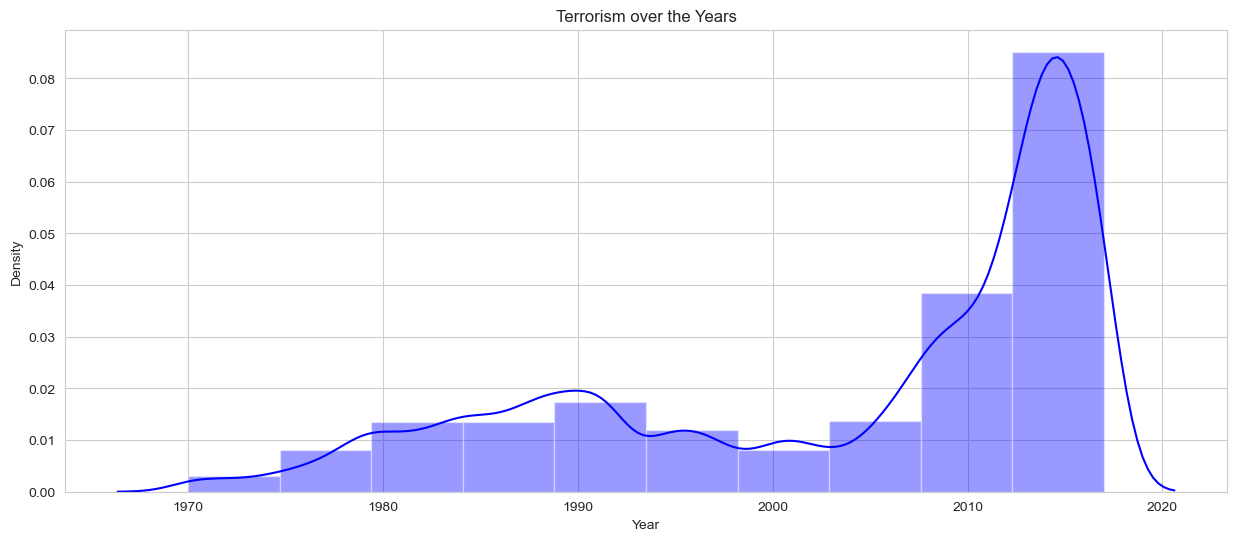

In [26]:
# How does the number of terrorist acts vary around the world and how has it changed over time? 
# Has the amount of attacks increased during recent years?

sns.set_style('whitegrid')
data5.sort_values('Year',ascending=True,inplace=True)
plt.figure(figsize=(15,6))
plt.xlabel('Years')
sns.distplot(data5.Year,bins=10,color="b").set_title('Terrorism over the Years');


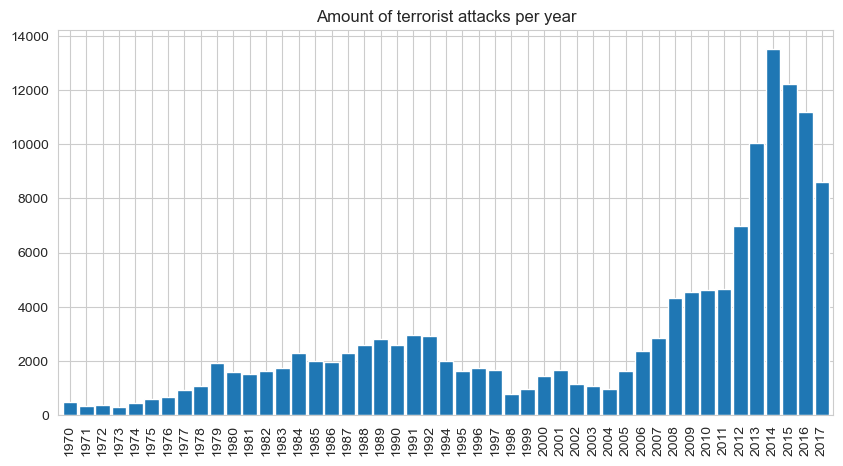

In [27]:
# Because it seems like there emerged a sudden spike in the number of terrorist attacks over the years 
# especially during post-2000, we try to see it in more detail based on each year. 

barplot = pd.value_counts(data5['Year'])\
.sort_index()\
.plot\
.bar(width=0.9, figsize=(10, 5), title="Amount of terrorist attacks per year")


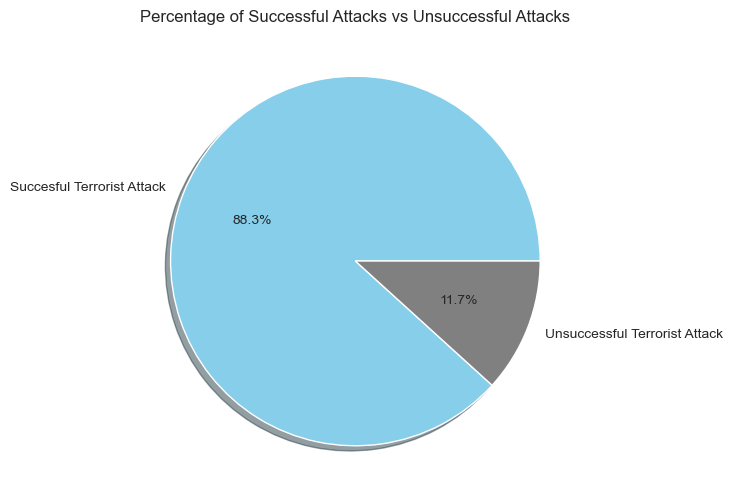

In [28]:
# What is the percentage of successful attacks in total? 

Success=data5.Success.value_counts()
Successful_Percentage=(Success[1]/Success.sum())*100
Successful_Percentage=round(Successful_Percentage,2)
Unsuccessful_Percentage=100-Successful_Percentage
Unsuccessful_Percentage=round(Unsuccessful_Percentage,2)

Overall_Attempts=[Successful_Percentage,Unsuccessful_Percentage]
label=['Succesful Terrorist Attack','Unsuccessful Terrorist Attack']
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plt.title('Percentage of Successful Attacks vs Unsuccessful Attacks')
plt.pie(Overall_Attempts, colors=['skyblue','Gray'],shadow=True,labels=label, autopct='%1.1f%%');

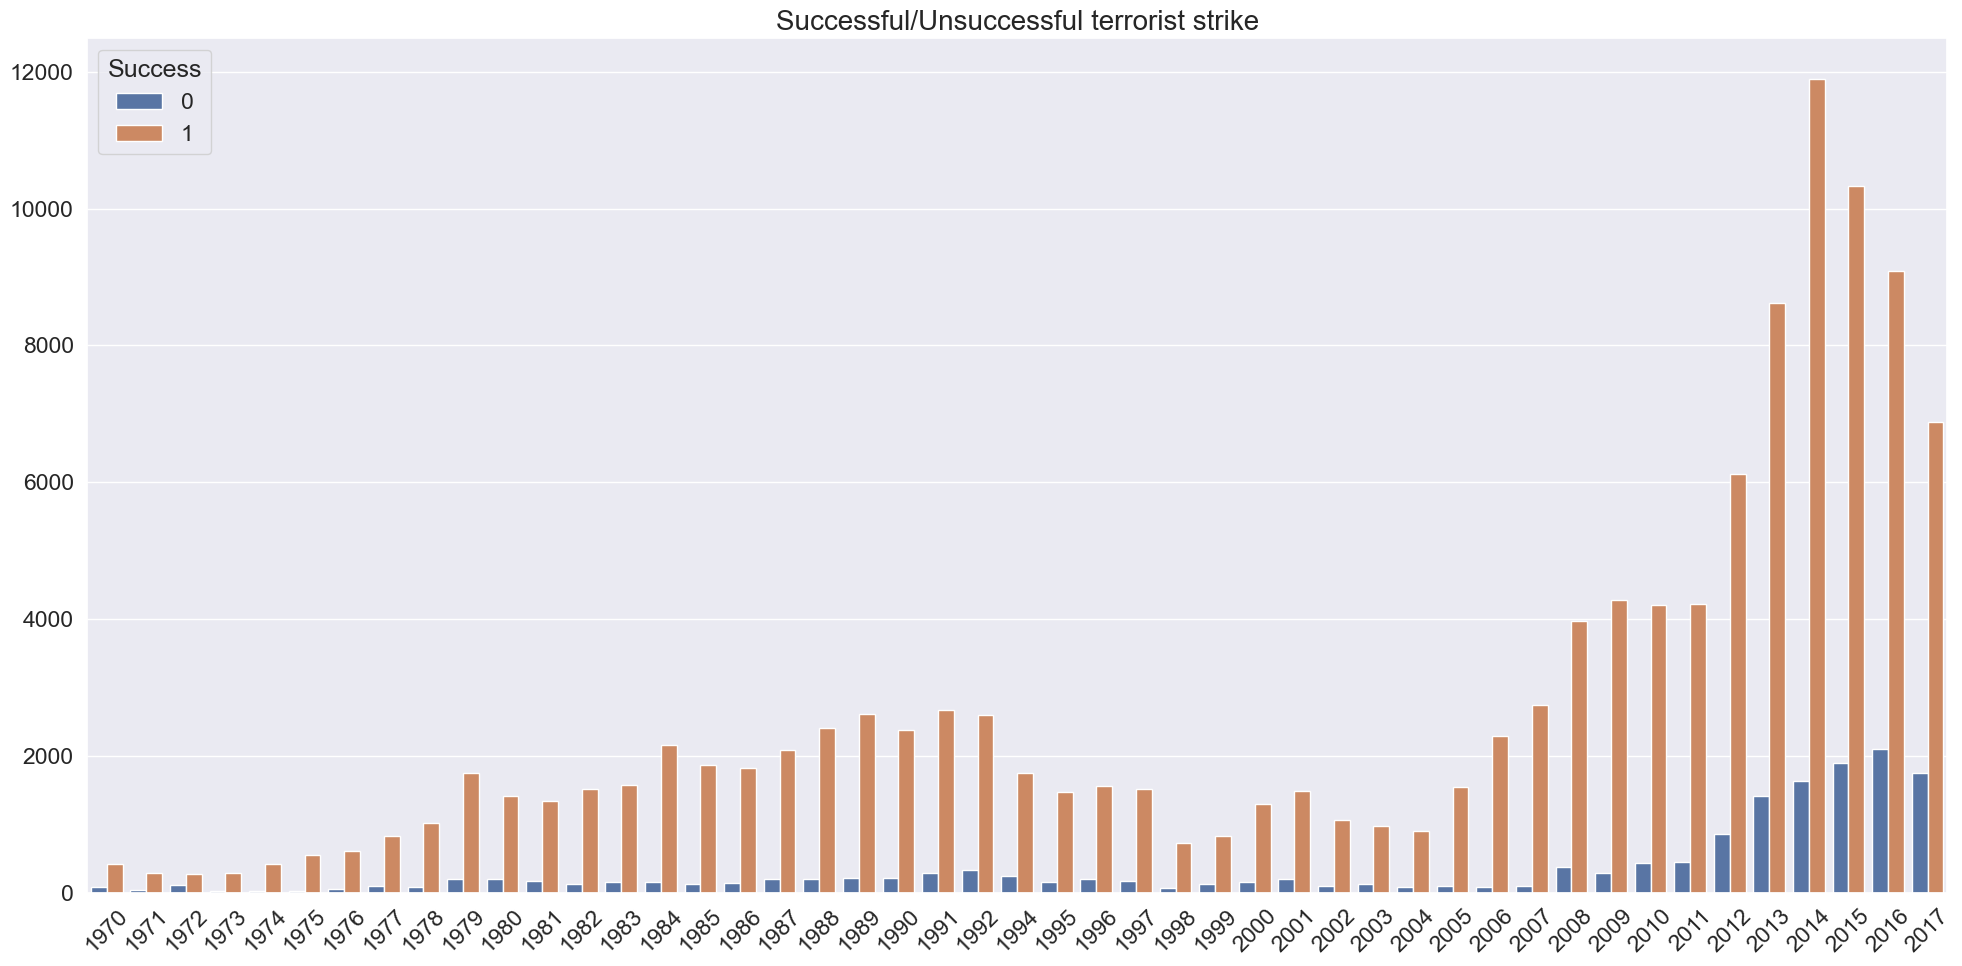

In [29]:
# What is the proportion of successful/unsuccessful terrorist attacks over the years? 

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=data5, hue='Success', orient='v');
plt.xlabel('')
plt.ylabel('')
plt.title('Successful/Unsuccessful terrorist strike', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



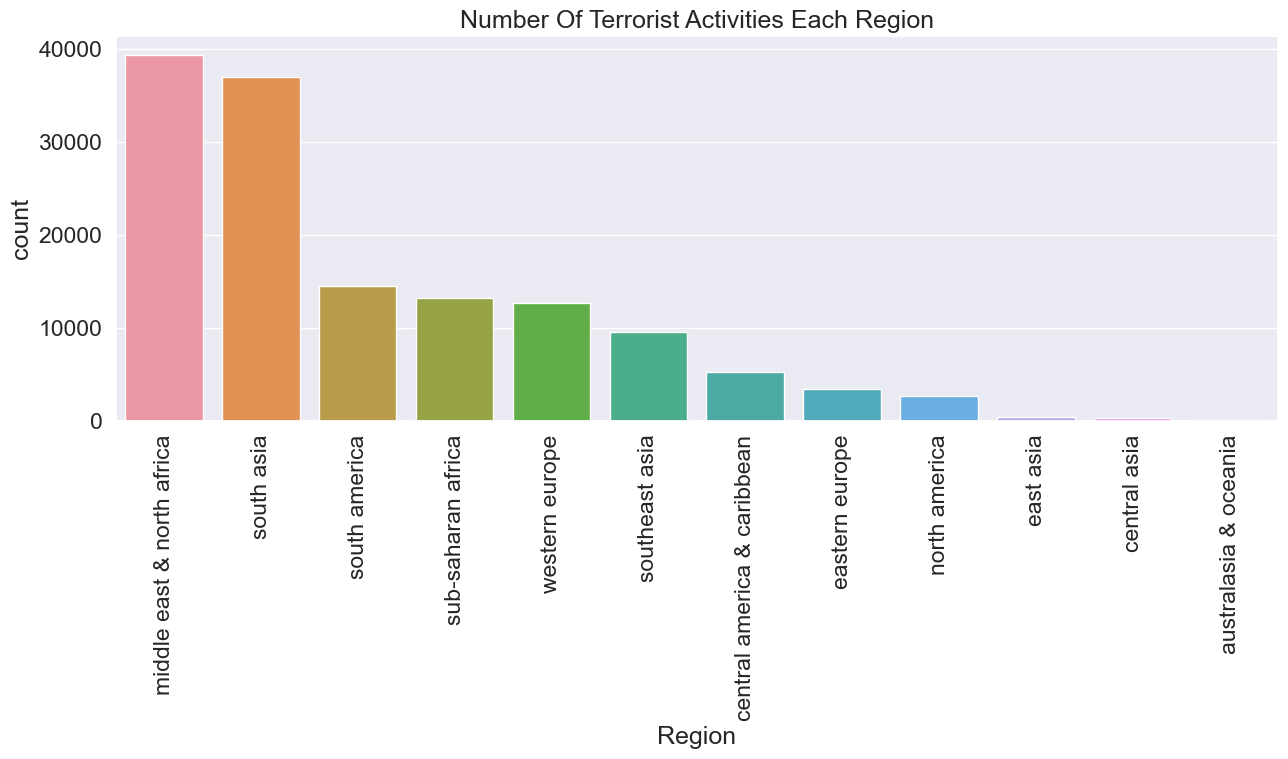

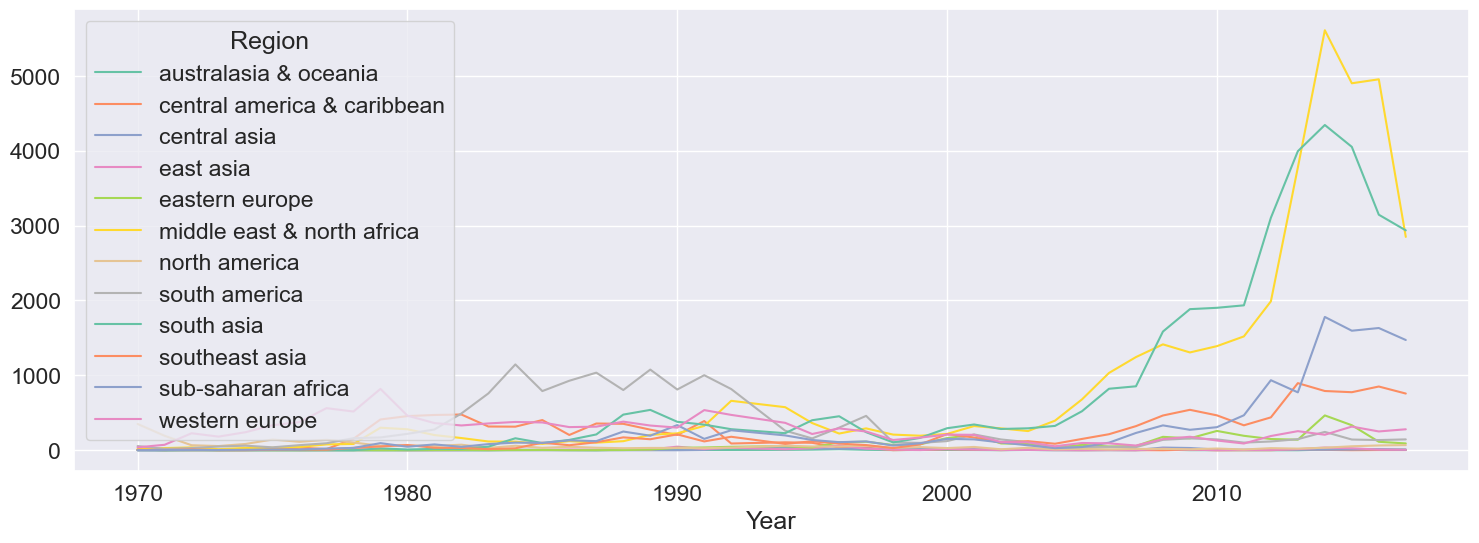

In [30]:
# Where do the terrorist attacks take place?

plt.subplots(figsize=(15,5))
sns.countplot('Region',data=data5,order=data5['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Region')
plt.show()

regional_trend=pd.crosstab(data5.Year,data5.Region)
regional_trend.plot(color=sns.color_palette('Set2'));
fig=plt.gcf()
fig.set_size_inches(18,6)


The most known country with terror attacks was iraq totalled at 21695


C:\Users\selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



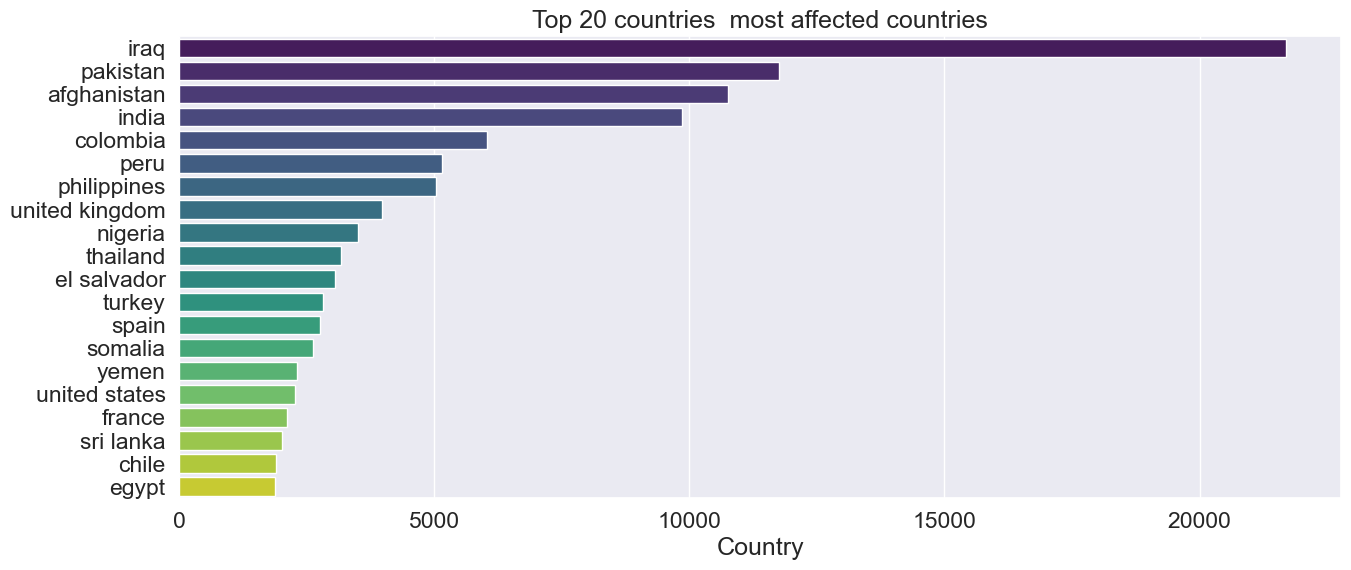

In [31]:
# Most affected countries
Country=data5.Country.value_counts().head(20)
plt.figure(figsize=(15,6))
sns.barplot(Country,Country.index,palette='viridis').set_title("Top 20 countries  most affected countries");

# Most known country
print('The most known country with terror attacks was' ,data5['Country'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',data5['Country'].value_counts(dropna=True, normalize=False, ascending=False).max())

In [32]:
# Countries with the most number of attacks
print('Countries with the most number of attacks:')
print(data5.Country.value_counts().head(15))
print(' ')
print(' ')

# We can visually see what parts of the world are most targetted
geo=pd.DataFrame({'Country': data5['Country'].value_counts().index,
                   'Number_of_Attacks': data5['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of Terrorist Attacks by Country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

geog = data5.head(1000)
geog = geog[['Latitude','Longitude']]
fig = px.scatter_geo(geog, lat='Latitude', lon='Longitude')

fig.show()

Countries with the most number of attacks:
iraq              21695
pakistan          11755
afghanistan       10751
india              9860
colombia           6046
peru               5162
philippines        5043
united kingdom     3980
nigeria            3507
thailand           3178
el salvador        3056
turkey             2822
spain              2772
somalia            2622
yemen              2314
Name: Country, dtype: int64
 
 


Cities with the most number of attacks:
baghdad         7221
unknown         6930
lima            2028
mosul           1883
karachi         1730
belfast         1681
santiago        1269
mogadishu       1197
san salvador    1074
kirkuk           805
athens           792
peshawar         760
quetta           754
istanbul         744
bogota           714
Name: City, dtype: int64
 
 


C:\Users\selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



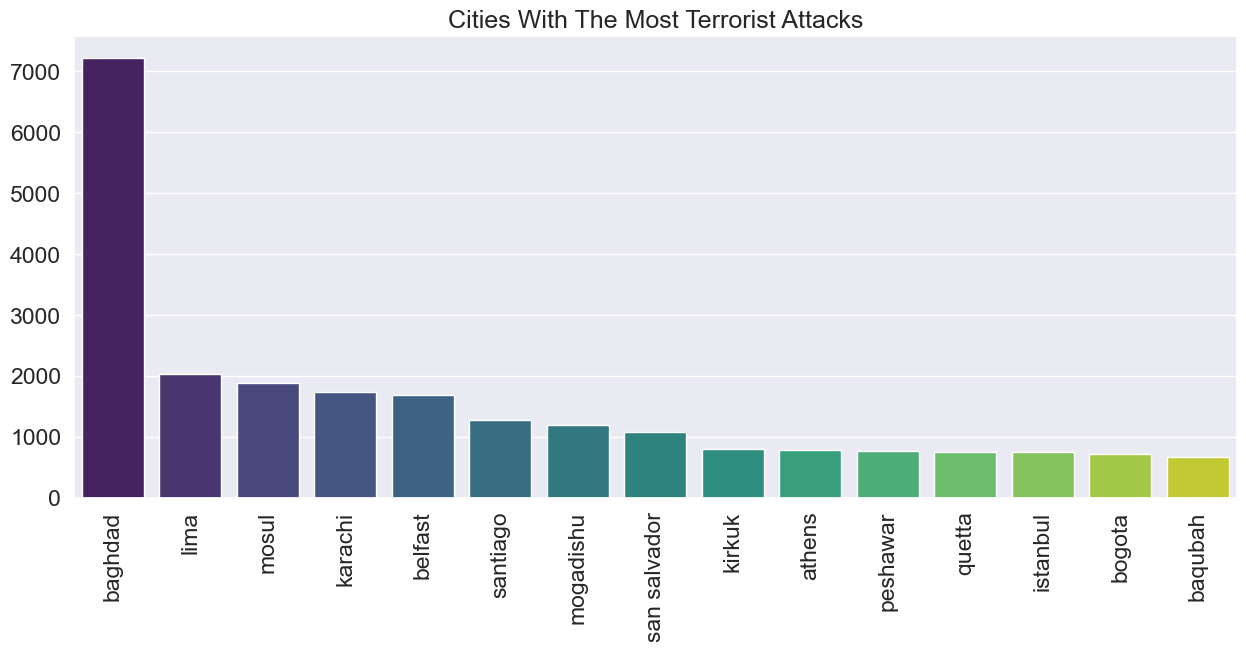

In [33]:
# Cities with the most number of attacks
print('Cities with the most number of attacks:')
print(data5.City.value_counts().head(15))
print(' ')
print(' ')

filtered = data5[data5['City'] != 'unknown']
plt.subplots(figsize=(15,6))
sns.barplot(filtered['City'].value_counts().head(15).index, filtered['City'].value_counts().head(15).values, 
            palette = "viridis")
plt.xticks(rotation=90)
plt.title('Cities With The Most Terrorist Attacks')
plt.show()

In [34]:
# Where is most of the casualties?
# How have casualties evolved throughout the years?

# Casualties per Year 
cpy = data5.groupby('Year', as_index=False)['Casualties'].sum()

trace = go.Scatter(x = cpy.Year, y = cpy.Casualties,
                   name = 'Casualties', line = dict(color = 'salmon', width = 4, dash ='dot'),
                   hoverinfo = 'x+y+name')

layout = go.Layout(title = 'Casualties per Year')

iplot(dict(data = [trace], layout = layout)) 

In [35]:
# Casualties by Region
cpr = data5.groupby('Region', as_index= False)['Casualties'].sum()
apr = data5.groupby('Region')['Region'].count()

trace_1 = go.Bar(x = cpr.Region, y = cpr.Casualties,
                 marker = dict(color = 'rgb(100, 229, 184)'),
                 name = 'Casualties')

trace_2 = go.Bar(x = apr.index, y = apr,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = "Total Casualties and Terror Attacks by Region", barmode='group' )

iplot(dict(data = [trace_1,trace_2], layout = layout))

In [36]:
# People killed in every country collectively
count_kill=data5.groupby('Country')['Number_of_Killed'].sum().to_frame() 

# Number of attacks for top-20 countries
count_terror=data5['Country'].value_counts()[:20].to_frame() 
count_terror.columns=['Attacks']

# Top 20 countries with no of attacks and no of people killed 
attack_kill = count_terror.merge(count_kill,left_index=True,right_index=True,how='left')
attack_kill

Attacks  Number_of_Killed
iraq              21695             66001
pakistan          11755             18604
afghanistan       10751             32325
india              9860             14840
colombia           6046              9035
peru               5162              8548
philippines        5043              5952
united kingdom     3980              2437
nigeria            3507             20603
thailand           3178              2112
el salvador        3056              3674
turkey             2822              3889
spain              2772              1127
somalia            2622              6083
yemen              2314              4679
united states      2275              3641
france             2113               467
sri lanka          2018              9665
chile              1902               192
egypt              1881              2835

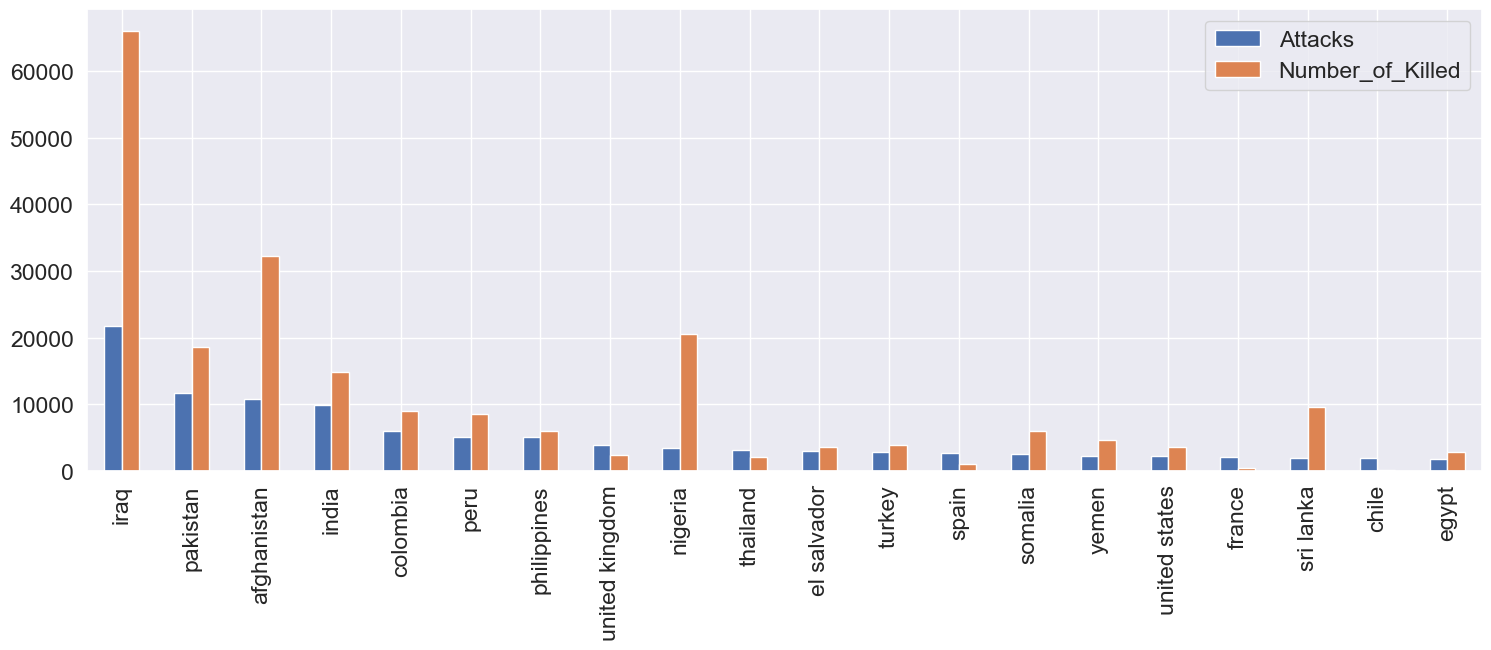

In [37]:
# Plotting - Top 20 countries with no of attacks and no of people killed 

attack_kill.plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)

In [38]:
# Countries with the most number of casualties
print('Countries with the most number of casualties:')
country_casualties = data5.groupby('Country', as_index= False)['Casualties'].sum() 
country_casualties_sorted = country_casualties.sort_values(by='Casualties', ascending=False)
print(country_casualties_sorted.head(10))
print(' ')

# Countries with the most number of attacks
print('Countries with the most number of attacks:')
print(data5['Country'].value_counts().head(10))


Countries with the most number of casualties:
           Country  Casualties
83            iraq      191554
0      afghanistan       70863
132       pakistan       56228
79           india       40984
129        nigeria       29923
187  united states       23930
173          syria       22160
165      sri lanka       21932
34        colombia       17380
2          algeria       16773
 
Countries with the most number of attacks:
iraq              21695
pakistan          11755
afghanistan       10751
india              9860
colombia           6046
peru               5162
philippines        5043
united kingdom     3980
nigeria            3507
thailand           3178
Name: Country, dtype: int64


In [39]:
# Countries with the least number of casualties
print('Countries with the least number of casualties:')
country_casualties = data5.groupby('Country', as_index= False)['Casualties'].sum() 
country_casualties_sorted = country_casualties.sort_values(by='Casualties', ascending=True)
print(country_casualties_sorted.head(100))
print(' ')

# Countries with the least number of attacks
print('Countries with the least number of attacks:')
country = data5.groupby('Country', as_index= False)['Country'].value_counts()
country_sorted = country.sort_values(by='count', ascending=True)
print(country_sorted.head(100))
print(' ')


Countries with the least number of casualties:
              Country  Casualties
125      new hebrides           0
126       new zealand           0
3             andorra           0
56   falkland islands           0
162       south yemen           0
..                ...         ...
200            zambia         108
172       switzerland         111
1             albania         114
84            ireland         121
159       south korea         136

[100 rows x 2 columns]
 
Countries with the least number of attacks:
               Country  count
162        south yemen      1
45            dominica      1
52   equatorial guinea      1
125       new hebrides      1
182       turkmenistan      1
..                 ...    ...
24            bulgaria     38
9           azerbaijan     41
36          costa rica     43
94              kuwait     44
25        burkina faso     45

[100 rows x 2 columns]
 


In [40]:
# Are certain nationalities more targeted? Is this related with freedom schedules?

# Read the open-source dataset of Human Freedom Index
freedom = pd.read_csv('C:/Users/selin/Desktop/hfi_cc_2018.csv')
freedom.head(5)


year ISO_code  countries                         region  pf_rol_procedural  \
0  2016      ALB    Albania                 Eastern Europe           6.661503   
1  2016      DZA    Algeria     Middle East & North Africa                NaN   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN   
3  2016      ARG  Argentina  Latin America & the Caribbean           7.098483   
4  2016      ARM    Armenia        Caucasus & Central Asia                NaN   

   pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
0      4.547244         4.666508  5.291752        8.920429   
1           NaN              NaN  3.819566        9.456254   
2           NaN              NaN  3.451814        8.060260   
3      5.791960         4.343930  5.744791        7.622974   
4           NaN              NaN  5.003205        8.808750   

   pf_ss_disappearances_disap  pf_ss_disappearances_violent  \
0                        10.0                      10.00000   
1                        10.0                       9.29403   
2                         5.0                      10.00000   
3                        10.0                      10.00000   
4                        10.0                      10.00000   

   pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  \
0                            10.0                        10.000000   
1                             5.0                         9.926119   
2                             7.5                        10.000000   
3                             7.5                        10.000000   
4                             7.5                         9.316196   

   pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  \
0                      10.000000             10.000000             10.0   
1                       9.990149              8.842060             10.0   
2                      10.000000              8.500000             10.0   
3                       9.990877              9.498175             10.0   
4                       9.931620              9.349563             10.0   

   pf_ss_women_missing  pf_ss_women_inheritance_widows  \
0                  7.5                             5.0   
1                  7.5                             0.0   
2                 10.0                             5.0   
3                 10.0                            10.0   
4                  5.0                            10.0   

   pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women  \
0                                5.0                      5.0     7.500000   
1                                0.0                      0.0     5.833333   
2                                5.0                      5.0     8.333333   
3                               10.0                     10.0    10.000000   
4                               10.0                     10.0     8.333333   

      pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  \
0  8.806810                   5.0                 10.0                5.0   
1  8.043882                   5.0                  5.0                5.0   
2  8.297865                   0.0                  5.0               10.0   
3  9.040383                  10.0                 10.0               10.0   
4  8.830549                   5.0                  5.0               10.0   

   pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  \
0     6.666667                          NaN                        NaN   
1     5.000000                          NaN                        NaN   
2     5.000000                          NaN                        NaN   
3    10.000000                          NaN                        NaN   
4     6.666667                          NaN                        NaN   

   pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  \
0               10.0                9.566667                  8.011111   
1                5

In [41]:
# Human Freedom Score & Count of Terrorist Attacks 

def reg(x):
    if x in ('South America','Central America & Caribbean'):
        res = 'Latin America & the Caribbean'
    elif x=='Central Asia':
        res = 'Caucasus & Central Asia'
    elif x=='Australasia & Oceania':
        res = 'Oceania'
    elif x in('South Asia','Southeast Asia',):
            res = 'South Asia'
    else:
        res=x
    return res

data_bx = data5

data_bx['Region'] = data_bx.Region.apply(reg)
data_bx = data_bx[data_bx.Year.isin(['2016','2015','2014','2013','2012','2011','2010','2009','2008'])]


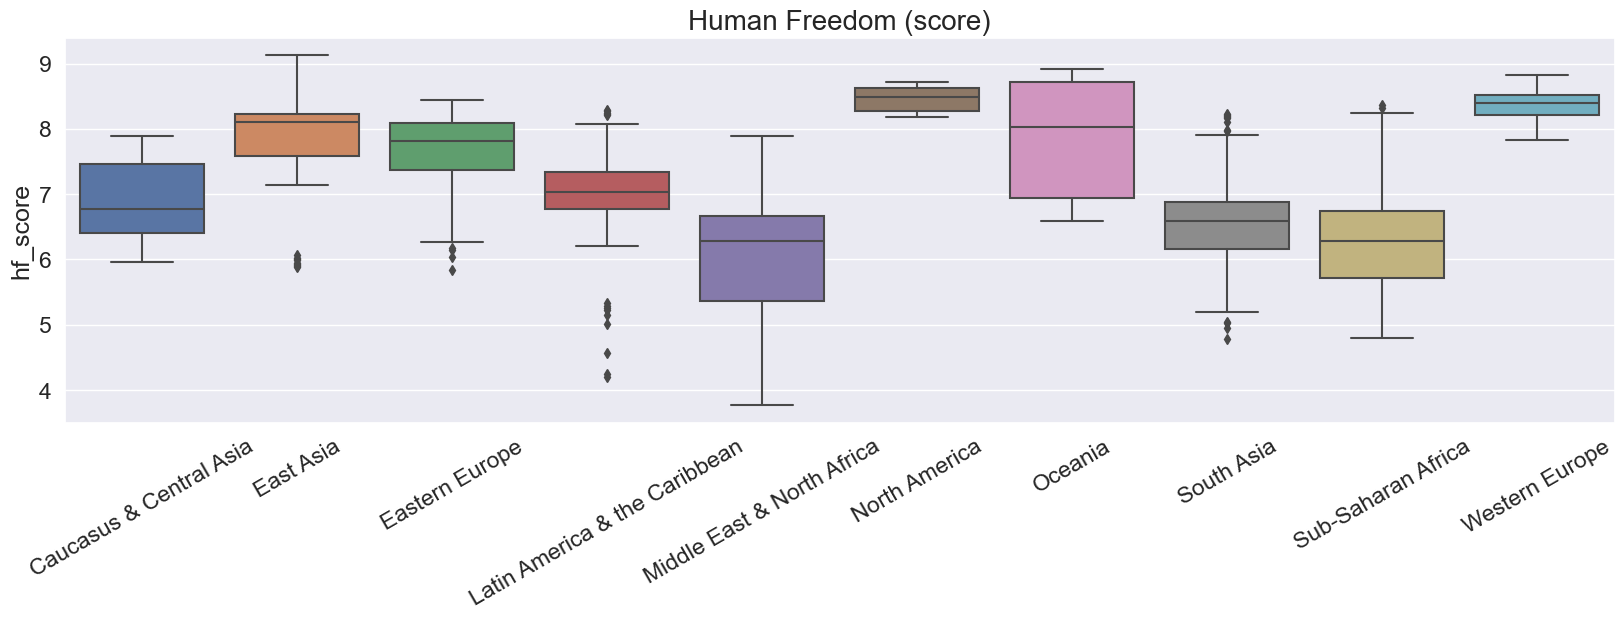

In [42]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
sns.boxplot(x='region',y='hf_score',data=freedom,order=['Caucasus & Central Asia','East Asia','Eastern Europe',\
                                'Latin America & the Caribbean','Middle East & North Africa','North America',\
                                    'Oceania','South Asia','Sub-Saharan Africa','Western Europe']);
plt.title("Human Freedom (score)", fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30)
plt.show()

data6= pd.DataFrame(data5, columns = ['central asia','east asia','eastern europe', 'central america & caribbean',
                                      'middle east & north africa','north america', 'australasia & oceania','south asia',
                                      'sub-saharan africa','western europe', 'Region']) 

apr1 = data6.groupby('Region')['Region'].count()
trace_12 = go.Bar(x = apr1.index, y = apr1,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')
layout = go.Layout(title = "Count of Terrorist Attacks", barmode='group' )

iplot(dict(data = [trace_12], layout = layout))


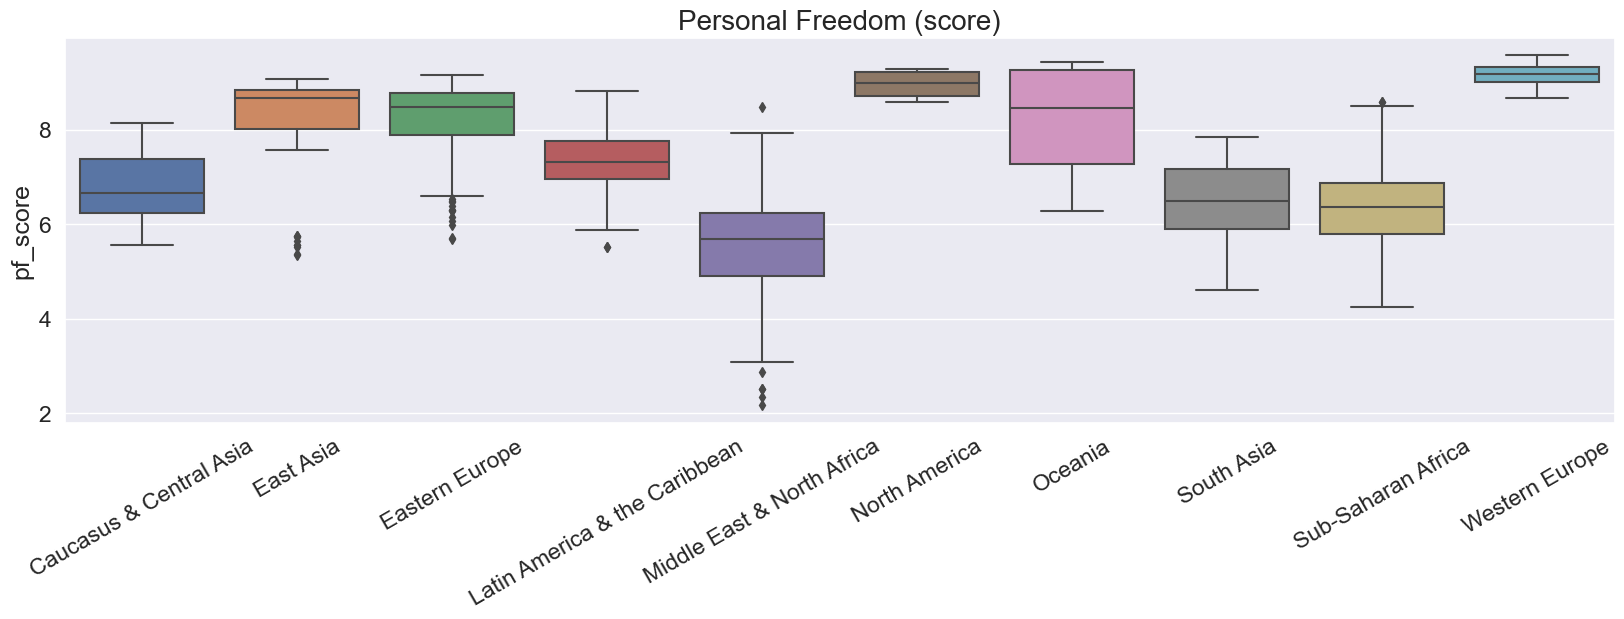

In [43]:
# Personal Freedom Score & Count of Terrorist Attacks

plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
sns.boxplot(x='region',y='pf_score',data=freedom,order=['Caucasus & Central Asia','East Asia','Eastern Europe',\
                                                         'Latin America & the Caribbean','Middle East & North Africa','North America',\
                                                         'Oceania','South Asia','Sub-Saharan Africa','Western Europe']);
plt.title("Personal Freedom (score)", fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30)
plt.show()

apr1 = data6.groupby('Region')['Region'].count()
trace_12 = go.Bar(x = apr1.index, y = apr1,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')
layout = go.Layout(title = "Count of Terrorist Attacks", barmode='group' )

iplot(dict(data = [trace_12], layout = layout))


In [44]:
data5

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  dominican republic   
334     197008020001  1970      8    2       united states   
333     197008010002  1970      8    1             belgium   
332     197008010001  1970      8    1       united states   
331     197007310004  1970      7   31           argentina   
...              ...   ...    ...  ...                 ...   
133121  201705020006  2017      5    2                iraq   
133120  201705020005  2017      5    2                iraq   
133119  201705020004  2017      5    2            pakistan   
133133  201705020034  2017      5    2               syria   
138878  201712310032  2017     12   31         philippines   

                             Region         State            City  Success  \
0       central america & caribbean       unknown   santo domingo        1   
334                   north america    california        berkeley        1   
333                  western europe      brussels        brussels        0   
332                   north america      new york   new york city        1   
331                   south america  buenos aires           garin        1   
...                             ...           ...             ...      ...   
133121   middle east & north africa         basra           basra        1   
133120   middle east & north africa       saladin          ishaqi        1   
133119                   south asia   balochistan        sangsila        1   
133133   middle east & north africa    al hasakah  rajm al-salibi        1   
138878               southeast asia   maguindanao   cotabato city        0   

              Attack_Type                       Target      Specific_Target  \
0           assassination  private citizens & property         julio guzman   
334     bombing/explosion                       police  berkeley police car   
333     bombing/explosion      government (diplomatic)     yugoslav embassy   
332     bombing/explosion                     business       bank of brazil   
331         armed assault  private citizens & property                 city   
...                   ...                          ...                  ...   
133121  bombing/explosion  private citizens & property               region   
133120  bombing/explosion                       police     joint checkpoint   
133119  bombing/explosion  private citizens & property        passenger van   
133133  bombing/explosion  private citizens & property            civilians   
138878  bombing/explosion                      unknown              unknown   

       Weapon_Type  Nationality_Victim  \
0          unknown  dominican republic   
334     explosives       united states   
333     explosives          yugoslavia   
332     explosives              brazil   
331       firearms           argentina   
...            ...                 ...   
133121  explosives                iraq   
133120  explosives                iraq   
133119  explosives            pakistan   
133133  explosives               syria   
138878  explosives         philippines   

                                           Group_Name  Latitude  Longitude  \
0                                              mano-d        18        -70   
334                                black nationalists        38       -122   
333                             croatian nationalists        51          4   
332                   weather underground, weathermen        41        -74   
331     revolutionary armed forces- argentina (far-a)       -34        -59   
...                                               ...       ...        ...   
133121                                        unknown        31         48   
133120    islamic state of iraq and the levant (isil)        34         44   
133119                                        unknown        29         69   
133133    islamic state of iraq and the levant (isil)        37         42   
138878                  

In [45]:
# Most preferred attack type 
print('The most preferred method of attack was',data5['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalling at',data5['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
s = data5['Suicides'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Out of',data5['Suicides'].value_counts(dropna=True, normalize=False, ascending=False).sum(),'total attacks',s[1],'were suicide attacks')
print(' ')

The most preferred method of attack was bombing/explosion totalling at 74073
 
Out of 138879 total attacks 3.9% were suicide attacks
 


C:\Users\selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



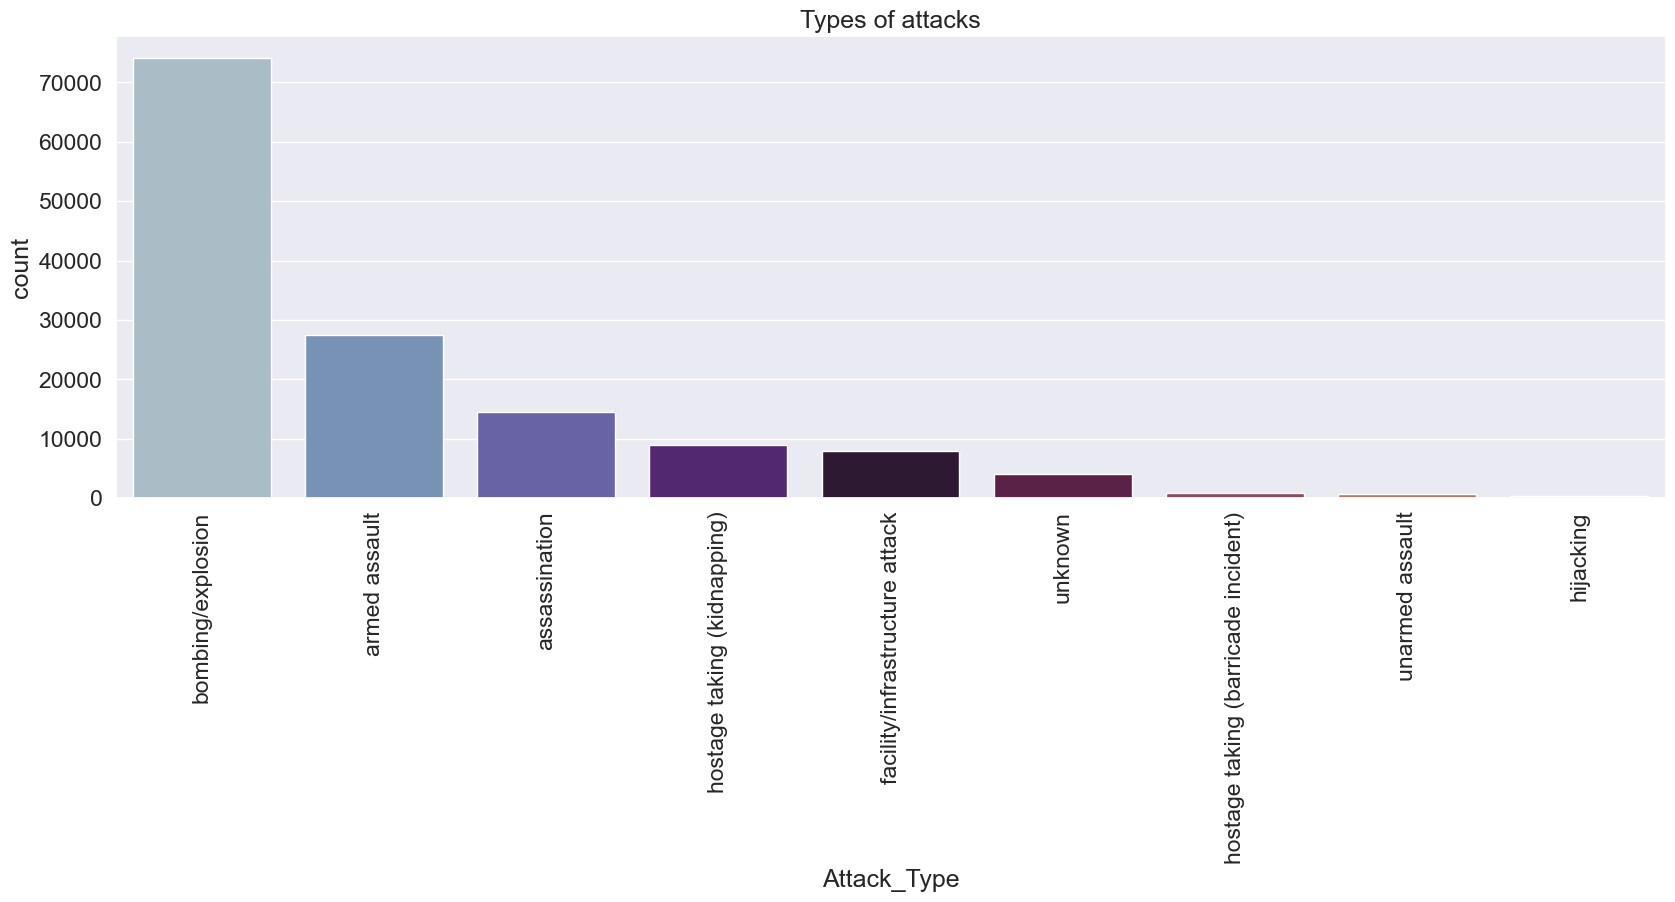

In [46]:
# Which attack types are popular?

plt.figure(figsize=(20,6))
sns.countplot('Attack_Type',data=data5,palette='twilight',order=data5['Attack_Type'].value_counts().index).set_title("Types of attacks")
plt.xticks(rotation=90);

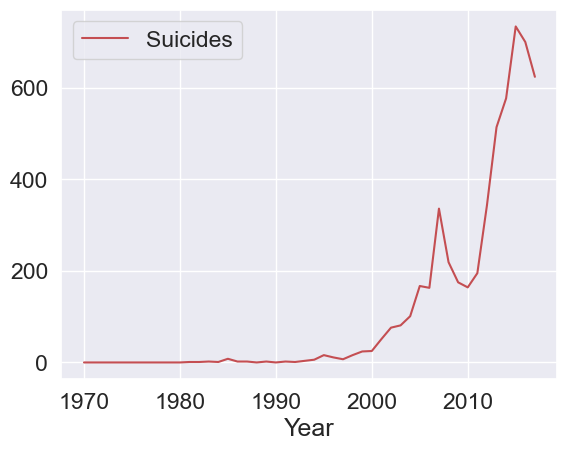

In [47]:
# Overtime did the number of suicide attacks increase?

suicides_by_year = data5[["Year","Suicides"]].groupby("Year").aggregate(np.sum)
suicides_by_year.plot(color = 'r');

In [48]:
terror_type = pd.crosstab(data5.Region,data5.Attack_Type)
terror_type

Attack_Type                  armed assault  assassination  bombing/explosion  \
Region                                                                         
australasia & oceania                   19             25                 45   
central america & caribbean           1205            782               2644   
central asia                            57             73                199   
east asia                               68             38                265   
eastern europe                         662            296               2042   
middle east & north africa            6044           3167              25934   
north america                          310            170               1293   
south america                         2369           2117               7687   
south asia                            8487           3315              18512   
southeast asia                        2711           1143               3986   
sub-saharan africa                    4309           1239               4399   
western europe                        1143           2161               7067   

Attack_Type                  facility/infrastructure attack  hijacking  \
Region                                                                   
australasia & oceania                                    46          2   
central america & caribbean                             199         10   
central asia                                             18          3   
east asia                                                78          5   
eastern europe                                          216          9   
middle east & north africa                              837         82   
north america                                           719         15   
south america                                           574         43   
south asia                                             1958         73   
southeast asia                                          820         51   
sub-saharan africa                                      610        101   
western europe                                         1815         38   

Attack_Type                  hostage taking (barricade incident)  \
Region                                                             
australasia & oceania                                          4   
central america & caribbean                                  144   
central asia                                                   1   
east asia                                                      2   
eastern europe                                                16   
middle east & north africa                                    88   
north america                                                 21   
south america                                                211   
south asia                                                   112   
southeast asia                                                59   
sub-saharan africa                                            89   
western europe                                                72   

Attack_Type                  hostage taking (kidnapping)  unarmed assault  \
Region                                                                      
australasia & oceania                                 10                9   
central america & caribbean                          172                7   
central asia                                          26                4   
east asia                                              2               33   
eastern europe                                       144               40   
middle east & north africa                          2159               84   
north america                                         63               57   
south america                                       1023               32   
south asia                                          2901              267   
southeast asia                            

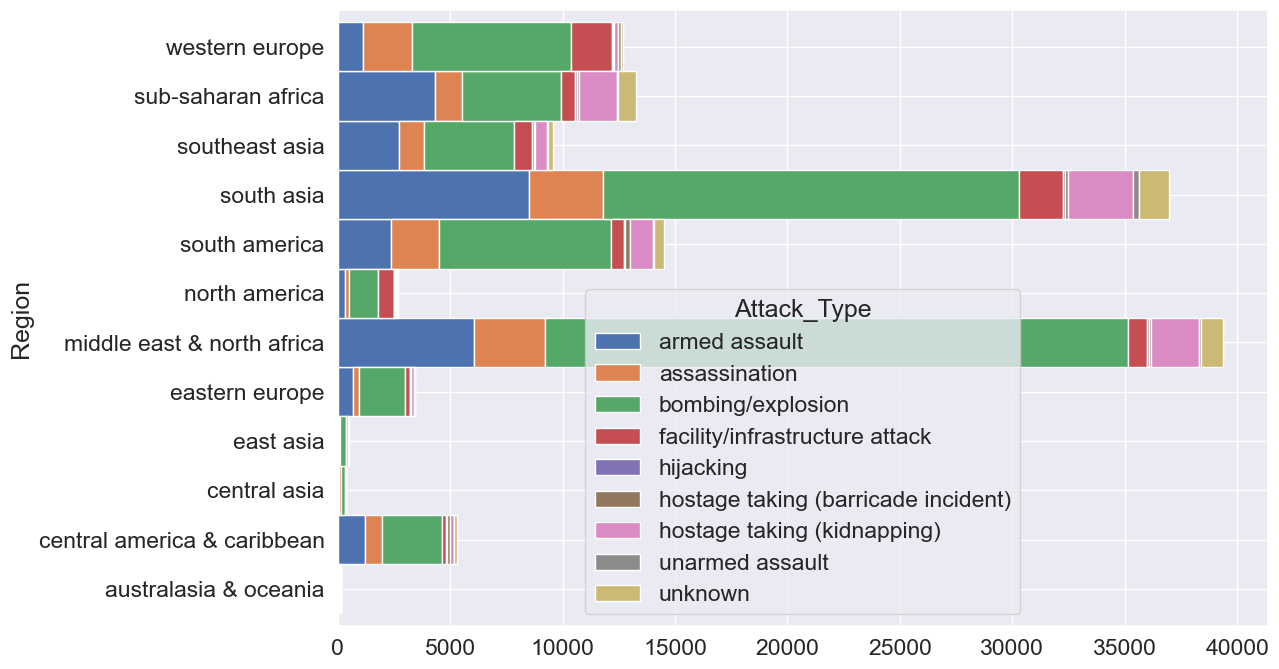

In [49]:
terror_type.plot.barh(stacked=True, width=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [50]:
# Which weapon types are popular?

# Most notably used weapon
print('The most used weapon in terror attacks was' ,data5['Weapon_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',data5['Weapon_Type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

The most used weapon in terror attacks was explosives totalled at 77361
 


In [51]:
weapons = data5['Weapon_Type'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

Weapon used  Weapon Count
0           explosives         77361
1             firearms         40636
2              unknown          9895
3           incendiary          7874
4                melee          2481
5             chemical           274
6   sabotage equipment           129
7                other            95
8              vehicle            79
9           biological            30
10        radiological            13
11        fake weapons            12

<AxesSubplot:xlabel='Weapon used'>

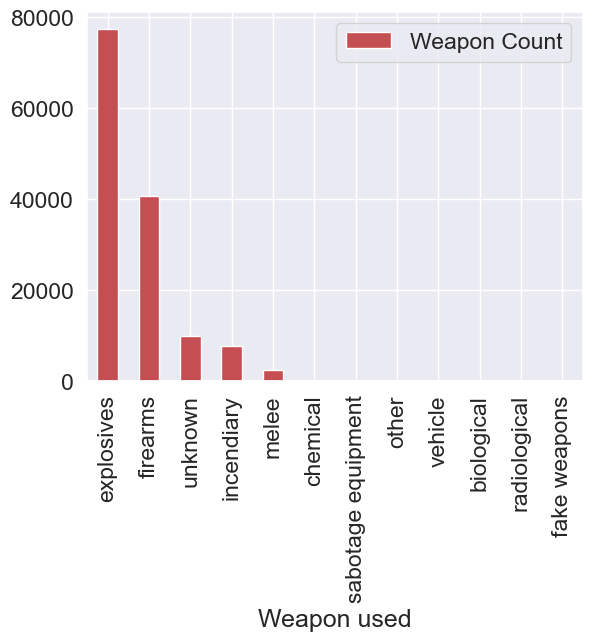

In [52]:
weapons.plot.bar(x='Weapon used', y='Weapon Count', rot=90, color = 'r')

In [53]:
# Who are the targets?

# Mostly targeted population
t = data5['Target'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('The main targets of terrorists were',data5['Target'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalling at',t[0],', while the second was',data5['Target'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'at',t[1])
print(' ')

The main targets of terrorists were private citizens & property totalling at 26.9% , while the second was police at 15.9%
 


C:\Users\selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



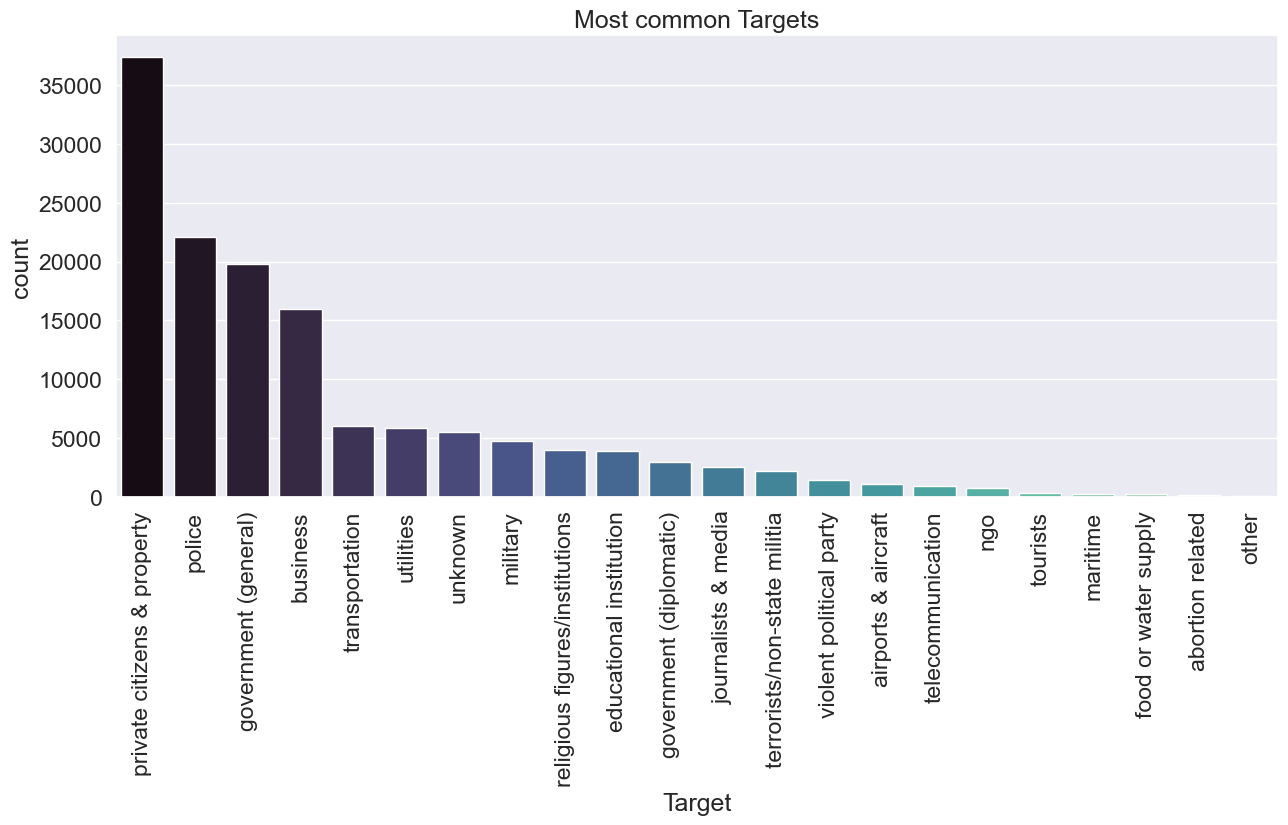

In [54]:
# Common targets 
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.countplot('Target',data=data5,order=data5['Target'].value_counts().index,palette='mako').set_title('Most common Targets');
plt.xticks(rotation=90);

In [55]:
# What are the targets by attack and weapon type? 

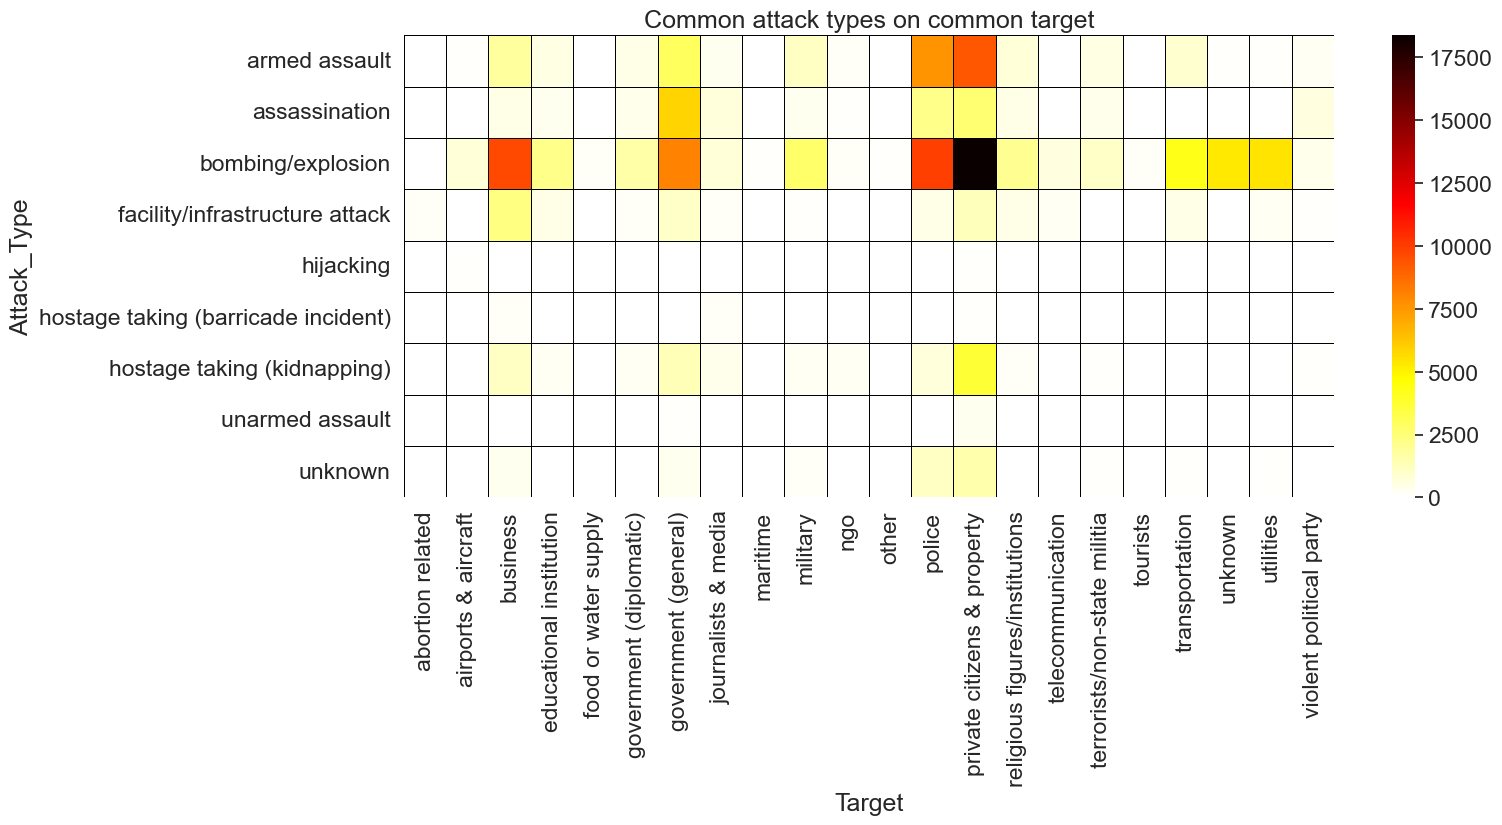

In [56]:
# Common Target vs. Common Attack Types
AttackXTarget=pd.crosstab(data5.Attack_Type,data5.Target)
AttackXTarget
plt.figure(figsize=(15,6))
sns.heatmap(AttackXTarget,fmt='d',linewidths=0.5,cmap='hot_r',linecolor='black').set_title('Common attack types on common target');

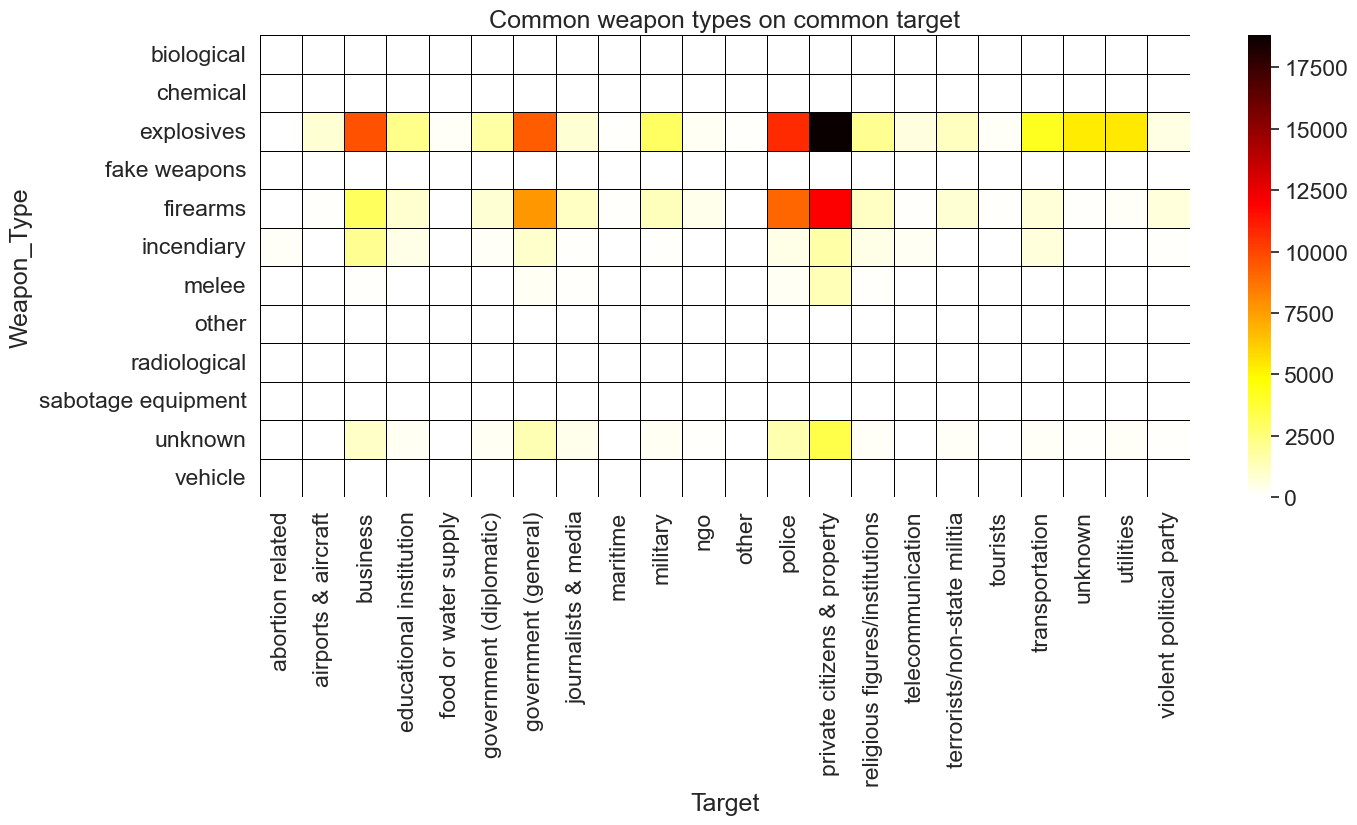

In [57]:
# Common Target vs. Common Weapon Types
AttackXTarget=pd.crosstab(data5.Weapon_Type,data5.Target)
AttackXTarget
plt.figure(figsize=(15,6))
sns.heatmap(AttackXTarget,fmt='d',linewidths=0.5,cmap='hot_r',linecolor='black').set_title('Common weapon types on common target');

In [58]:
target_kill=data5.groupby('Target')['Number_of_Killed'].sum().to_frame()
target_wound=data5.groupby('Target')['Number_of_Wounded'].sum().to_frame()

print(target_kill.sort_values(by=['Number_of_Killed'],ascending=False))
print(target_wound.sort_values(by=['Number_of_Wounded'],ascending=False))


                                Number_of_Killed
Target                                          
private citizens & property               129242
police                                     50116
government (general)                       24974
business                                   21567
military                                   17330
transportation                             13312
religious figures/institutions             12943
terrorists/non-state militia                6230
airports & aircraft                         3647
unknown                                     3585
educational institution                     3456
government (diplomatic)                     2838
violent political party                     1962
utilities                                   1830
journalists & media                         1369
maritime                                    1148
ngo                                          943
tourists                                     640
food or water supply

#### 2nd Part: Predictive Analysis

##### First part: “Can casualties be predicted from GTD-exclusive features?”

In [59]:
# Target and Features

In [60]:
# Our final dataset
data5

ID  Year  Month  Day             Country  \
0       197000000001  1970      7    2  dominican republic   
334     197008020001  1970      8    2       united states   
333     197008010002  1970      8    1             belgium   
332     197008010001  1970      8    1       united states   
331     197007310004  1970      7   31           argentina   
...              ...   ...    ...  ...                 ...   
133121  201705020006  2017      5    2                iraq   
133120  201705020005  2017      5    2                iraq   
133119  201705020004  2017      5    2            pakistan   
133133  201705020034  2017      5    2               syria   
138878  201712310032  2017     12   31         philippines   

                             Region         State            City  Success  \
0       central america & caribbean       unknown   santo domingo        1   
334                   north america    california        berkeley        1   
333                  western europe      brussels        brussels        0   
332                   north america      new york   new york city        1   
331                   south america  buenos aires           garin        1   
...                             ...           ...             ...      ...   
133121   middle east & north africa         basra           basra        1   
133120   middle east & north africa       saladin          ishaqi        1   
133119                   south asia   balochistan        sangsila        1   
133133   middle east & north africa    al hasakah  rajm al-salibi        1   
138878               southeast asia   maguindanao   cotabato city        0   

              Attack_Type                       Target      Specific_Target  \
0           assassination  private citizens & property         julio guzman   
334     bombing/explosion                       police  berkeley police car   
333     bombing/explosion      government (diplomatic)     yugoslav embassy   
332     bombing/explosion                     business       bank of brazil   
331         armed assault  private citizens & property                 city   
...                   ...                          ...                  ...   
133121  bombing/explosion  private citizens & property               region   
133120  bombing/explosion                       police     joint checkpoint   
133119  bombing/explosion  private citizens & property        passenger van   
133133  bombing/explosion  private citizens & property            civilians   
138878  bombing/explosion                      unknown              unknown   

       Weapon_Type  Nationality_Victim  \
0          unknown  dominican republic   
334     explosives       united states   
333     explosives          yugoslavia   
332     explosives              brazil   
331       firearms           argentina   
...            ...                 ...   
133121  explosives                iraq   
133120  explosives                iraq   
133119  explosives            pakistan   
133133  explosives               syria   
138878  explosives         philippines   

                                           Group_Name  Latitude  Longitude  \
0                                              mano-d        18        -70   
334                                black nationalists        38       -122   
333                             croatian nationalists        51          4   
332                   weather underground, weathermen        41        -74   
331     revolutionary armed forces- argentina (far-a)       -34        -59   
...                                               ...       ...        ...   
133121                                        unknown        31         48   
133120    islamic state of iraq and the levant (isil)        34         44   
133119                                        unknown        29         69   
133133    islamic state of iraq and the levant (isil)        37         42   
138878                  

In [61]:
data5.columns

Index(['ID', 'Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Success', 'Attack_Type', 'Target', 'Specific_Target', 'Weapon_Type',
       'Nationality_Victim', 'Group_Name', 'Latitude', 'Longitude',
       'Number_of_Killed', 'Number_of_Wounded', 'Casualties',
       'Check_Casualties', 'Suicides', 'More_Than_24_Hours', 'Vicinity',
       'Confirmation_of_Group', 'Claimed_by_Group', 'Any_Connection',
       'Property_Damage', 'Hostage_or_Kidnap', 'Summary'],
      dtype='object')

In [62]:
#  Columns that are exclusively part of the Global Terrorism Database will be tested for their significance 
# on predicting casualties.

data7 =  data5[['Year', 'Month', 'Day','Country', 'Region','Latitude', 'Longitude', 'More_Than_24_Hours', 
                'Vicinity','Confirmation_of_Group', 'Claimed_by_Group', 'Any_Connection','Property_Damage', 
                'Hostage_or_Kidnap',  'Success', 'Attack_Type', 'Target', 'Weapon_Type','Suicides', 'Check_Casualties']]

# Feature columns selection which are GTD-exclusive features
feature_cols = ['Year', 'Month', 'Day','Country', 'Region','Latitude', 'Longitude', 'More_Than_24_Hours', 
                'Vicinity','Confirmation_of_Group', 'Claimed_by_Group', 'Any_Connection','Property_Damage', 
                'Hostage_or_Kidnap',  'Success', 'Attack_Type', 'Target', 'Weapon_Type', 'Suicides']

# Target is a binary value: were there any casualties in the attack?
target_col = 'Check_Casualties'

data7

Year  Month  Day             Country                       Region  \
0       1970      7    2  dominican republic  central america & caribbean   
334     1970      8    2       united states                north america   
333     1970      8    1             belgium               western europe   
332     1970      8    1       united states                north america   
331     1970      7   31           argentina                south america   
...      ...    ...  ...                 ...                          ...   
133121  2017      5    2                iraq   middle east & north africa   
133120  2017      5    2                iraq   middle east & north africa   
133119  2017      5    2            pakistan                   south asia   
133133  2017      5    2               syria   middle east & north africa   
138878  2017     12   31         philippines               southeast asia   

        Latitude  Longitude  More_Than_24_Hours  Vicinity  \
0             18        -70                   0         0   
334           38       -122                   0         0   
333           51          4                   0         0   
332           41        -74                   0         0   
331          -34        -59                   0         0   
...          ...        ...                 ...       ...   
133121        31         48                   0         0   
133120        34         44                   0         0   
133119        29         69                   0         0   
133133        37         42                   0         0   
138878         7        124                   0         0   

        Confirmation_of_Group  Claimed_by_Group  Any_Connection  \
0                         0.0               0.0             0.0   
334                       0.0               0.0             0.0   
333                       0.0               0.0             0.0   
332                       0.0               0.0             0.0   
331                       0.0               0.0             0.0   
...                       ...               ...             ...   
133121                    0.0               0.0             0.0   
133120                    1.0               1.0             0.0   
133119                    0.0               0.0             0.0   
133133                    1.0               1.0             1.0   
138878                    0.0               0.0             0.0   

        Property_Damage  Hostage_or_Kidnap  Success        Attack_Type  \
0                     0                0.0        1      assassination   
334                   1                0.0        1  bombing/explosion   
333                   0                0.0        0  bombing/explosion   
332                   1                0.0        1  bombing/explosion   
331                   1                0.0        1      armed assault   
...                 ...                ...      ...                ...   
133121                0                0.0        1  bombing/explosion   
133120                0                0.0        1  bombing/explosion   
133119                1                0.0        1  bombing/explosion   
133133                1                0.0        1  bombing/explosion   
138878                0                0.0        0  bombing/explosion   

                             Target Weapon_Type  Suicides  Check_Casualties  
0       private citizens & property     unknown         0                 1  
334                          police  explosives         0                 0  
333         government (diplomatic)  explosives         0                 0  
332                        business  explosives         0                 0  
331     private citizens & property    firearms         0                 0  
...                             ...         ...       ...               ...  
133121  private citizens & property  explosives         0                 1  
133120                       pol

In [63]:
lb = preprocessing.LabelEncoder()
data7['Country'] = lb.fit_transform(data5['Country'])
data7['Region'] = lb.fit_transform(data5['Region'])
data7['Attack_Type'] = lb.fit_transform(data5['Attack_Type'])
data7['Target'] = lb.fit_transform(data5['Target'])
data7['Weapon_Type'] = lb.fit_transform(data5['Weapon_Type'])

# Define X and Y
X = data7[feature_cols].fillna(0)
y = data7[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Users\selin\AppData\Local\Temp\ipykernel_412\2622655460.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\selin\AppData\Local\Temp\ipykernel_412\2622655460.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\selin\AppData\Local\Temp\ipykernel_412\2622655460.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [64]:
data7

Year  Month  Day  Country  Region  Latitude  Longitude  \
0       1970      7    2       46       1        18        -70   
334     1970      8    2      187       6        38       -122   
333     1970      8    1       15      11        51          4   
332     1970      8    1      187       6        41        -74   
331     1970      7   31        5       7       -34        -59   
...      ...    ...  ...      ...     ...       ...        ...   
133121  2017      5    2       83       5        31         48   
133120  2017      5    2       83       5        34         44   
133119  2017      5    2      132       8        29         69   
133133  2017      5    2      173       5        37         42   
138878  2017     12   31      138       9         7        124   

        More_Than_24_Hours  Vicinity  Confirmation_of_Group  Claimed_by_Group  \
0                        0         0                    0.0               0.0   
334                      0         0                    0.0               0.0   
333                      0         0                    0.0               0.0   
332                      0         0                    0.0               0.0   
331                      0         0                    0.0               0.0   
...                    ...       ...                    ...               ...   
133121                   0         0                    0.0               0.0   
133120                   0         0                    1.0               1.0   
133119                   0         0                    0.0               0.0   
133133                   0         0                    1.0               1.0   
138878                   0         0                    0.0               0.0   

        Any_Connection  Property_Damage  Hostage_or_Kidnap  Success  \
0                  0.0                0                0.0        1   
334                0.0                1                0.0        1   
333                0.0                0                0.0        0   
332                0.0                1                0.0        1   
331                0.0                1                0.0        1   
...                ...              ...                ...      ...   
133121             0.0                0                0.0        1   
133120             0.0                0                0.0        1   
133119             0.0                1                0.0        1   
133133             1.0                1                0.0        1   
138878             0.0                0                0.0        0   

        Attack_Type  Target  Weapon_Type  Suicides  Check_Casualties  
0                 1      13           10         0                 1  
334               2      12            2         0                 0  
333               2       5            2         0                 0  
332               2       2            2         0                 0  
331               0      13            4         0                 0  
...             ...     ...          ...       ...               ...  
133121            2      13            2         0                 1  
133120            2      12            2         1                 1  
133119            2      13            2         0                 0  
133133            2      13            2         1                 1  
138878            2      19            2         0                 0  

[138879 rows x 20 columns]

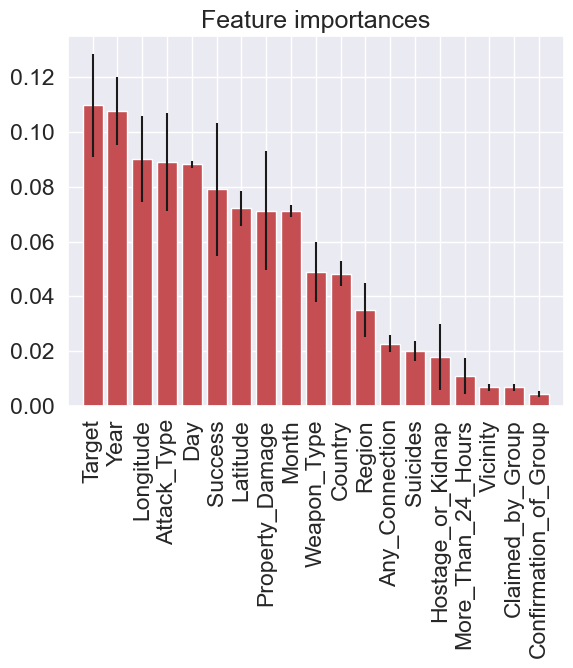

In [65]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [66]:
feature_cols = ['Target', 'Longitude', 'Attack_Type', 'Success', 'Latitude', 'Property_Damage', 'Weapon_Type', 'Country']

X = data7[feature_cols].fillna(0) # Assign chosen features to X.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

0.8300451228878648

Confusion matrix, without normalization
[[13691  3709]
 [ 3372 20892]]
Normalized confusion matrix
[[0.79 0.21]
 [0.14 0.86]]


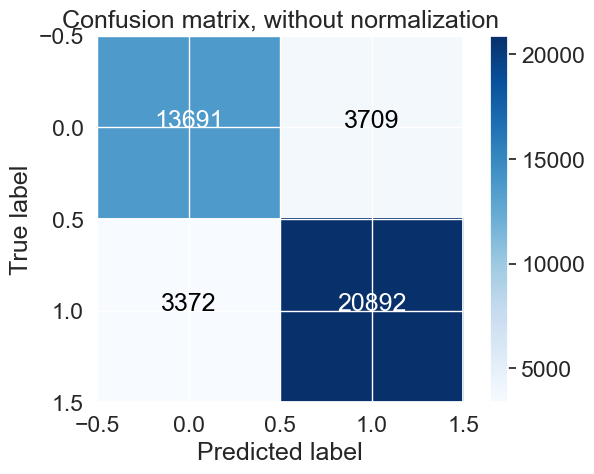

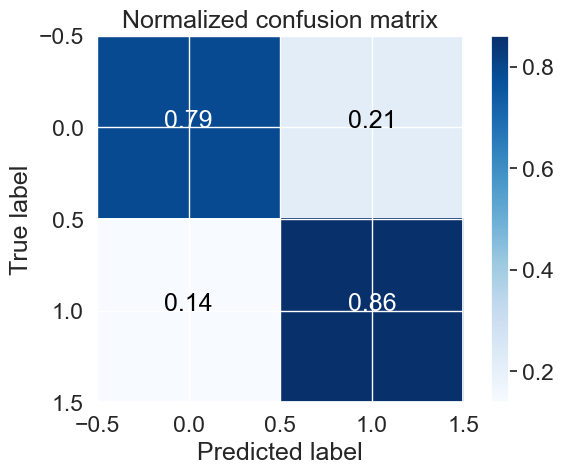

In [68]:
cnf_matrix = confusion_matrix(y_test, y_pred)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

In [69]:
# Better validation with K-fold.
model = RandomForestClassifier(n_estimators=20)

scores = cross_val_score(model, X, y, cv=10) # Ten-fold cross validation.
print(scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

[0.74 0.75 0.74 0.8  0.78 0.79 0.79 0.79 0.81 0.83]
Accuracy: 0.78 (+/- 0.06)


In [70]:
# Simply predict the most frequent value every time.
# This determines the baseline accuracy.
model = DummyClassifier(strategy="most_frequent")

%time model.fit(X_train, y_train)

%time y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

Wall time: 0 ns
Wall time: 0 ns


0.5823732718894009

##### Second part: “Whether a terrorist attack is expected to succeed or fail?"

###### Downloading and shaping the data and viewing it from various angles

In [71]:
df = pd.read_csv('C:/Users/selin/Desktop/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', header = 0, usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
df.head(5)

iyear  imonth  iday  extended  country         country_txt  region  \
0   1970       7     2         0       58  Dominican Republic       2   
1   1970       0     0         0      130              Mexico       1   
2   1970       1     0         0      160         Philippines       5   
3   1970       1     0         0       78              Greece       8   
4   1970       1     0         0      101               Japan       4   

    latitude   longitude  multiple  success  suicide  attacktype1  \
0  18.456792  -69.951164       0.0        1        0            1   
1  19.371887  -99.086624       0.0        1        0            6   
2  15.478598  120.599741       0.0        1        0            1   
3  37.997490   23.762728       0.0        1        0            3   
4  33.580412  130.396361       0.0        1        0            7   

                  attacktype1_txt  targtype1                targtype1_txt  \
0                   Assassination         14  Private Citizens & Property   
1     Hostage Taking (Kidnapping)          7      Government (Diplomatic)   
2                   Assassination         10          Journalists & Media   
3               Bombing/Explosion          7      Government (Diplomatic)   
4  Facility/Infrastructure Attack          7      Government (Diplomatic)   

   natlty1         natlty1_txt  individual  claimed  weaptype1 weaptype1_txt  \
0     58.0  Dominican Republic           0      NaN         13       Unknown   
1     21.0             Belgium           0      NaN         13       Unknown   
2    217.0       United States           0      NaN         13       Unknown   
3    217.0       United States           0      NaN          6    Explosives   
4    217.0       United States           0      NaN          8    Incendiary   

   nkill  nkillter  nwound  nwoundte  
0    1.0       NaN     0.0       NaN  
1    0.0       NaN     0.0       NaN  
2    1.0       NaN     0.0       NaN  
3    NaN       NaN     NaN       NaN  
4    NaN       NaN     NaN       NaN

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country          181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region           181691 non-null  int64  
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   multiple         181690 non-null  float64
 10  success          181691 non-null  int64  
 11  suicide          181691 non-null  int64  
 12  attacktype1      181691 non-null  int64  
 13  attacktype1_txt  181691 non-null  object 
 14  targtype1        181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  natlty1          180132 non-null  floa

In [73]:
df.describe()

iyear         imonth           iday       extended  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean     2002.638997       6.467277      15.505644       0.045346   
std        13.259430       3.388303       8.814045       0.208063   
min      1970.000000       0.000000       0.000000       0.000000   
25%      1991.000000       4.000000       8.000000       0.000000   
50%      2009.000000       6.000000      15.000000       0.000000   
75%      2014.000000       9.000000      23.000000       0.000000   
max      2017.000000      12.000000      31.000000       1.000000   

             country         region       latitude     longitude  \
count  181691.000000  181691.000000  177135.000000  1.771340e+05   
mean      131.968501       7.160938      23.498343 -4.586957e+02   
std       112.414535       2.933408      18.569242  2.047790e+05   
min         4.000000       1.000000     -53.154613 -8.618590e+07   
25%        78.000000       5.000000      11.510046  4.545640e+00   
50%        98.000000       6.000000      31.467463  4.324651e+01   
75%       160.000000      10.000000      34.685087  6.871033e+01   
max      1004.000000      12.000000      74.633553  1.793667e+02   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

           targtype1        natlty1     individual        claimed  \
count  181691.000000  180132.000000  181691.000000  115571.000000   
mean        8.439719     127.686441       0.002950       0.049666   
std         6.653838      89.299120       0.054234       1.093195   
min         1.000000       4.000000       0.000000      -9.000000   
25%         3.000000      83.000000       0.000000       0.000000   
50%         4.000000     101.000000       0.000000       0.000000   
75%        14.000000     173.000000       0.000000       0.000000   
max        22.000000    1004.000000       1.000000       1.000000   

           weaptype1          nkill       nkillter         nwound  \
count  181691.000000  171378.000000  114733.000000  165380.000000   
mean        6.447325       2.403272       0.508058       3.167668   
std         2.173435      11.545741       4.199937      35.949392   
min         1.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         6.000000       0.000000       0.000000       0.000000   
75%         6.000000       2.000000       0.000000       2.000000   
max        13.000000    1570.000000     500.000000    8191.000000   

            nwoundte  
count  112548.000000  
mean        0.107163  
std         1.488881  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       200.000000

In [74]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
extended               0
country                0
country_txt            0
region                 0
latitude            4556
longitude           4557
multiple               1
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
targtype1_txt          0
natlty1             1559
natlty1_txt         1559
individual             0
claimed            66120
weaptype1              0
weaptype1_txt          0
nkill              10313
nkillter           66958
nwound             16311
nwoundte           69143
dtype: int64

In [75]:
# There were still NaN's in some of the variables. So we use the means of the available values to replace them. 
df.nkill = np.round(df.nkill.fillna(df.nkill.median())).astype(int) 
df.latitude = np.round(df.latitude.fillna(df.latitude.median())).astype(int) 
df.longitude = np.round(df.longitude.fillna(df.longitude.median())).astype(int) 
df.natlty1 = np.round(df.natlty1.fillna(df.natlty1.median())).astype(int)
df.nkillter = np.round(df.nkillter.fillna(df.nkillter.median())).astype(int) 
df.extended = np.round(df.extended.fillna(df.extended.median())).astype(int) 

df.claimed = df.claimed.fillna(0) 
df.multiple = df.multiple.fillna(0) 
df.claimed.replace(-9,0, inplace = True)

df

iyear  imonth  iday  extended  country         country_txt  region  \
0        1970       7     2         0       58  Dominican Republic       2   
1        1970       0     0         0      130              Mexico       1   
2        1970       1     0         0      160         Philippines       5   
3        1970       1     0         0       78              Greece       8   
4        1970       1     0         0      101               Japan       4   
...       ...     ...   ...       ...      ...                 ...     ...   
181686   2017      12    31         0      182             Somalia      11   
181687   2017      12    31         0      200               Syria      10   
181688   2017      12    31         0      160         Philippines       5   
181689   2017      12    31         0       92               India       6   
181690   2017      12    31         0      160         Philippines       5   

        latitude  longitude  multiple  success  suicide  attacktype1  \
0             18        -70       0.0        1        0            1   
1             19        -99       0.0        1        0            6   
2             15        121       0.0        1        0            1   
3             38         24       0.0        1        0            3   
4             34        130       0.0        1        0            7   
...          ...        ...       ...      ...      ...          ...   
181686         2         45       0.0        1        0            2   
181687        35         36       0.0        1        0            3   
181688         7        124       0.0        1        0            7   
181689        25         94       0.0        0        0            3   
181690         7        124       0.0        0        0            3   

                       attacktype1_txt  targtype1  \
0                        Assassination         14   
1          Hostage Taking (Kidnapping)          7   
2                        Assassination         10   
3                    Bombing/Explosion          7   
4       Facility/Infrastructure Attack          7   
...                                ...        ...   
181686                   Armed Assault          4   
181687               Bombing/Explosion          4   
181688  Facility/Infrastructure Attack         14   
181689               Bombing/Explosion          2   
181690               Bombing/Explosion         20   

                      targtype1_txt  natlty1         natlty1_txt  individual  \
0       Private Citizens & Property       58  Dominican Republic           0   
1           Government (Diplomatic)       21             Belgium           0   
2               Journalists & Media      217       United States           0   
3           Government (Diplomatic)      217       United States           0   
4           Government (Diplomatic)      217       United States           0   
...                             ...      ...                 ...         ...   
181686                     Military      182             Somalia           0   
181687                     Military      167              Russia           0   
181688  Private Citizens & Property      160         Philippines           0   
181689         Government (General)       92               India           0   
181690                      Unknown      160         Philippines           0   

        claimed  weaptype1 weaptype1_txt  nkill  nkillter  nwound  nwoundte  
0           0.0         13       Unknown      1         0     0.0       NaN  
1           0.0         13       Unknown      0         0     0.0       NaN  
2           0.0         13       Unknown      1         0     0.0       NaN  
3           0.0          6    Explosives      0         0     NaN       NaN  
4           0.0          8    Incendiary      0         0     NaN       NaN  
...         ...        ...           ...    ...       ...     ...       ...  
181686      1.0          5      Firearms      1         0     

In [76]:
df = df.drop(['claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df.head()

iyear  imonth  iday  extended  country         country_txt  region  \
0   1970       7     2         0       58  Dominican Republic       2   
1   1970       0     0         0      130              Mexico       1   
2   1970       1     0         0      160         Philippines       5   
3   1970       1     0         0       78              Greece       8   
4   1970       1     0         0      101               Japan       4   

   latitude  longitude  multiple  success  suicide  attacktype1  \
0        18        -70       0.0        1        0            1   
1        19        -99       0.0        1        0            6   
2        15        121       0.0        1        0            1   
3        38         24       0.0        1        0            3   
4        34        130       0.0        1        0            7   

                  attacktype1_txt  targtype1                targtype1_txt  \
0                   Assassination         14  Private Citizens & Property   
1     Hostage Taking (Kidnapping)          7      Government (Diplomatic)   
2                   Assassination         10          Journalists & Media   
3               Bombing/Explosion          7      Government (Diplomatic)   
4  Facility/Infrastructure Attack          7      Government (Diplomatic)   

   natlty1         natlty1_txt  individual  weaptype1 weaptype1_txt  nkill  
0       58  Dominican Republic           0         13       Unknown      1  
1       21             Belgium           0         13       Unknown      0  
2      217       United States           0         13       Unknown      1  
3      217       United States           0          6    Explosives      0  
4      217       United States           0          8    Incendiary      0

In [77]:
df.isnull().sum()

iyear                 0
imonth                0
iday                  0
extended              0
country               0
country_txt           0
region                0
latitude              0
longitude             0
multiple              0
success               0
suicide               0
attacktype1           0
attacktype1_txt       0
targtype1             0
targtype1_txt         0
natlty1               0
natlty1_txt        1559
individual            0
weaptype1             0
weaptype1_txt         0
nkill                 0
dtype: int64

In [78]:
df = df.drop(['natlty1_txt'], axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int32  
 4   country          181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region           181691 non-null  int64  
 7   latitude         181691 non-null  int32  
 8   longitude        181691 non-null  int32  
 9   multiple         181691 non-null  float64
 10  success          181691 non-null  int64  
 11  suicide          181691 non-null  int64  
 12  attacktype1      181691 non-null  int64  
 13  attacktype1_txt  181691 non-null  object 
 14  targtype1        181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  natlty1          181691 non-null  int3

In [80]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
latitude           0
longitude          0
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
natlty1            0
individual         0
weaptype1          0
weaptype1_txt      0
nkill              0
dtype: int64

In [81]:
df.describe()

iyear         imonth           iday       extended  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean     2002.638997       6.467277      15.505644       0.045346   
std        13.259430       3.388303       8.814045       0.208063   
min      1970.000000       0.000000       0.000000       0.000000   
25%      1991.000000       4.000000       8.000000       0.000000   
50%      2009.000000       6.000000      15.000000       0.000000   
75%      2014.000000       9.000000      23.000000       0.000000   
max      2017.000000      12.000000      31.000000       1.000000   

             country         region       latitude     longitude  \
count  181691.000000  181691.000000  181691.000000  1.816910e+05   
mean      131.968501       7.160938      23.691867 -4.461515e+02   
std       112.414535       2.933408      18.362842  2.021946e+05   
min         4.000000       1.000000     -53.000000 -8.618590e+07   
25%        78.000000       5.000000      12.000000  7.000000e+00   
50%        98.000000       6.000000      31.000000  4.300000e+01   
75%       160.000000      10.000000      35.000000  6.800000e+01   
max      1004.000000      12.000000      75.000000  1.790000e+02   

            multiple        success        suicide    attacktype1  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean        0.137772       0.889598       0.036507       3.247547   
std         0.344662       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

           targtype1        natlty1     individual      weaptype1  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean        8.439719     127.457458       0.002950       6.447325   
std         6.653838      88.949238       0.054234       2.173435   
min         1.000000       4.000000       0.000000       1.000000   
25%         3.000000      83.000000       0.000000       5.000000   
50%         4.000000     101.000000       0.000000       6.000000   
75%        14.000000     168.000000       0.000000       6.000000   
max        22.000000    1004.000000       1.000000      13.000000   

               nkill  
count  181691.000000  
mean        2.266860  
std        11.227057  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max      1570.000000

In [82]:
attacks_per_type = (df.groupby('attacktype1_txt').attacktype1_txt.count())
successes_per_type = (df.groupby('attacktype1_txt').success.sum())

trace2 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[89,106,183,373,485,2752,2911,3295,11144],
    name='Nr of terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,0,0, 0.8)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace1 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[76,105,149,333,457,2530,2637,2588,9393],
    name='Nr of succesful terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace1, trace2]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks 1970-2016 by Type',
    barmode='group',
    bargap=0.1,
    bargroupgap=0,
    autosize=False,
    width=1000,
    height=500,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/AttacksByType.png")

In [83]:
# Next we have a look at the variables' correlations, numerically and graphically.
df.corr()

iyear    imonth      iday  extended   country    region  \
iyear        1.000000  0.000139  0.018254  0.091754 -0.135023  0.401384   
imonth       0.000139  1.000000  0.005497 -0.000468 -0.006305 -0.002999   
iday         0.018254  0.005497  1.000000 -0.004700  0.003468  0.009710   
extended     0.091754 -0.000468 -0.004700  1.000000 -0.020466  0.038389   
country     -0.135023 -0.006305  0.003468 -0.020466  1.000000  0.148597   
region       0.401384 -0.002999  0.009710  0.038389  0.148597  1.000000   
latitude     0.154389 -0.015925  0.002760 -0.022920  0.177108  0.296557   
longitude    0.003803 -0.003832 -0.002258  0.000521 -0.000276  0.004239   
multiple     0.093734 -0.004420 -0.000394 -0.013440 -0.022220  0.011968   
success     -0.082963 -0.002845 -0.011802  0.073233 -0.037827 -0.030909   
suicide      0.137736  0.003071  0.003593 -0.033961 -0.050360  0.112672   
attacktype1  0.074153  0.006705 -0.005333  0.272272 -0.021384  0.007642   
targtype1    0.079082 -0.000948 -0.000052  0.011613 -0.019703  0.041396   
natlty1     -0.019855 -0.004783  0.003724  0.013918  0.598196  0.149508   
individual   0.017944 -0.001661 -0.003788 -0.008929  0.027918 -0.059963   
weaptype1   -0.011737  0.007863 -0.003019  0.207802 -0.023708  0.013257   
nkill        0.021252  0.004031 -0.003225  0.014586 -0.014383  0.043113   

             latitude  longitude  multiple   success   suicide  attacktype1  \
iyear        0.154389   0.003803  0.093734 -0.082963  0.137736     0.074153   
imonth      -0.015925  -0.003832 -0.004420 -0.002845  0.003071     0.006705   
iday         0.002760  -0.002258 -0.000394 -0.011802  0.003593    -0.005333   
extended    -0.022920   0.000521 -0.013440  0.073233 -0.033961     0.272272   
country      0.177108  -0.000276 -0.022220 -0.037827 -0.050360    -0.021384   
region       0.296557   0.004239  0.011968 -0.030909  0.112672     0.007642   
latitude     1.000000   0.001441 -0.024466 -0.071192  0.066479     0.010904   
longitude    0.001441   1.000000  0.000937 -0.000840  0.000475     0.001532   
multiple    -0.024466   0.000937  1.000000  0.020310  0.030751     0.081875   
success     -0.071192  -0.000840  0.020310  1.000000 -0.031155     0.048408   
suicide      0.066479   0.000475  0.030751 -0.031155  1.000000    -0.029962   
attacktype1  0.010904   0.001532  0.081875  0.048408 -0.029962     1.000000   
targtype1   -0.021161  -0.003362  0.079645 -0.059637 -0.023440     0.014513   
natlty1     -0.003643  -0.000444 -0.013450 -0.004888 -0.009709     0.013605   
individual   0.040151   0.000111  0.004756 -0.013868  0.000775     0.016438   
weaptype1   -0.008530   0.001558  0.032538 -0.008178 -0.039928     0.658954   
nkill       -0.011785  -0.000569 -0.001068  0.049619  0.136385    -0.003448   

             targtype1   natlty1  individual  weaptype1     nkill  
iyear         0.079082 -0.019855    0.017944  -0.011737  0.021252  
imonth       -0.000948 -0.004783   -0.001661   0.007863  0.004031  
iday         -0.000052  0.003724   -0.003788  -0.003019 -0.003225  
extended      0.011613  0.013918   -0.008929   0.207802  0.014586  
country      -0.019703  0.598196    0.027918  -0.023708 -0.014383  
region        0.041396  0.149508   -0.059963   0.013257  0.043113  
latitude     -0.021161 -0.003643    0.040151  -0.008530 -0.011785  
longitude    -0.003362 -0.000444    0.000111   0.001558 -0.000569  
multiple      0.079645 -0.013450    0.004756   0.032538 -0.001068  
success      -0.059637 -0.004888   -0.013868  -0.008178  0.049619  
suicide      -0.023440 -0.009709    0.000775  -0.039928  0.136385  
attacktype1   0.014513  0.013605    0.016438   0.658954 -0.003448  
targtype1     1.000000 -0.037783    0.005267   0.019846  0.008466  
natlty1      -0.037783  1.000000    0.030541  -0.008848  0.001313  
individual    0.005267  0.030541    1.000000   0.005754 -0.001275  
weaptype1     0.019846 -0.008848    0.005754   1.000000 -0.001528  
nkill         0.008466  0.001313   -0.001275  -0.001528  1.000000

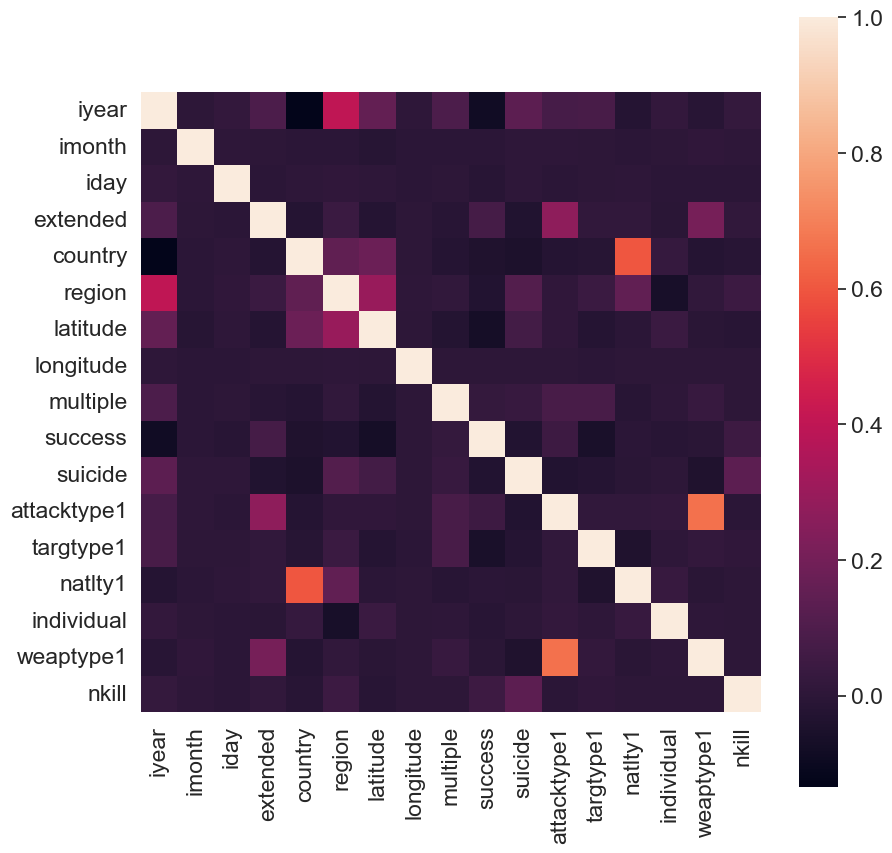

In [84]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

###### Creating a Train and Test set

In [85]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill'],
      dtype='object')

In [86]:
#from sklearn.model_selection import train_test_split
X = df.drop(['iyear', 'success','country', 'region','country_txt', 'attacktype1_txt','targtype1_txt','natlty1','weaptype1_txt'], axis=1)
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
X

imonth  iday  extended  latitude  longitude  multiple  suicide  \
0            7     2         0        18        -70       0.0        0   
1            0     0         0        19        -99       0.0        0   
2            1     0         0        15        121       0.0        0   
3            1     0         0        38         24       0.0        0   
4            1     0         0        34        130       0.0        0   
...        ...   ...       ...       ...        ...       ...      ...   
181686      12    31         0         2         45       0.0        0   
181687      12    31         0        35         36       0.0        0   
181688      12    31         0         7        124       0.0        0   
181689      12    31         0        25         94       0.0        0   
181690      12    31         0         7        124       0.0        0   

        attacktype1  targtype1  individual  weaptype1  nkill  
0                 1         14           0         13      1  
1                 6          7           0         13      0  
2                 1         10           0         13      1  
3                 3          7           0          6      0  
4                 7          7           0          8      0  
...             ...        ...         ...        ...    ...  
181686            2          4           0          5      1  
181687            3          4           0          6      2  
181688            7         14           0          8      0  
181689            3          2           0          6      0  
181690            3         20           0          6      0  

[181691 rows x 12 columns]

In [88]:
features = [ 'imonth', 'iday', 'extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill']

###### Presenting the Performance Measures for the models

We use a Confusion Matrix first on a Decision Tree then on a Random Forest to evaluate the accuracy of each method.<br>

|       |                 |
|-----------------------|:--------------------:|
| True Negatives (TN)  |  False Positives (FP) |
| False Negatives (FN)  |  True Positives (TP) |
<br>
In a perfect model both **False Positives** and **False Negatives** in the matrix would be zero!<br><br>
In our model for predicting the succesfulness of terrorist attacks the interpretation is as follows:<br><br>
- TN = The model predicts correctly a non-succesful attack
- TP = The model predicts correctly a succesful attack
- FN = The model predicts a succesful attack wrongfully to be non-succesful
- FP = The model predicts a non-succesful attack wrongfully to be succesful<br><br>

The **Precision**(=accuracy of the positive predictions), **Recall**(=ratio of positive instances correctly detected by the classifier) and **f1-score** may be more concise metrics, however.

- **Precision** for 'success' = TP/(TP+FP) <br>
- **Precision** for *not* 'success' = TN/(TN+FN) <br><br>
- **Recall** for 'success' = TP/(TP+FN)  <br>
- **Recall** for *not* 'success' = TN/(TN+FP)  <br><br>
- The **f1-score** is the harmonic mean of Precision and Recall.


###### Creating two Decision Trees models; a simple and a more complex one

In [89]:
# Decision Tree - with max node depth of 3

In [90]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill'],
      dtype='object')

In [91]:
df = df.drop(['region'], axis=1)
df

iyear  imonth  iday  extended  country         country_txt  latitude  \
0        1970       7     2         0       58  Dominican Republic        18   
1        1970       0     0         0      130              Mexico        19   
2        1970       1     0         0      160         Philippines        15   
3        1970       1     0         0       78              Greece        38   
4        1970       1     0         0      101               Japan        34   
...       ...     ...   ...       ...      ...                 ...       ...   
181686   2017      12    31         0      182             Somalia         2   
181687   2017      12    31         0      200               Syria        35   
181688   2017      12    31         0      160         Philippines         7   
181689   2017      12    31         0       92               India        25   
181690   2017      12    31         0      160         Philippines         7   

        longitude  multiple  success  suicide  attacktype1  \
0             -70       0.0        1        0            1   
1             -99       0.0        1        0            6   
2             121       0.0        1        0            1   
3              24       0.0        1        0            3   
4             130       0.0        1        0            7   
...           ...       ...      ...      ...          ...   
181686         45       0.0        1        0            2   
181687         36       0.0        1        0            3   
181688        124       0.0        1        0            7   
181689         94       0.0        0        0            3   
181690        124       0.0        0        0            3   

                       attacktype1_txt  targtype1  \
0                        Assassination         14   
1          Hostage Taking (Kidnapping)          7   
2                        Assassination         10   
3                    Bombing/Explosion          7   
4       Facility/Infrastructure Attack          7   
...                                ...        ...   
181686                   Armed Assault          4   
181687               Bombing/Explosion          4   
181688  Facility/Infrastructure Attack         14   
181689               Bombing/Explosion          2   
181690               Bombing/Explosion         20   

                      targtype1_txt  natlty1  individual  weaptype1  \
0       Private Citizens & Property       58           0         13   
1           Government (Diplomatic)       21           0         13   
2               Journalists & Media      217           0         13   
3           Government (Diplomatic)      217           0          6   
4           Government (Diplomatic)      217           0          8   
...                             ...      ...         ...        ...   
181686                     Military      182           0          5   
181687                     Military      167           0          6   
181688  Private Citizens & Property      160           0          8   
181689         Government (General)       92           0          6   
181690                      Unknown      160           0          6   

       weaptype1_txt  nkill  
0            Unknown      1  
1            Unknown      0  
2            Unknown      1  
3         Explosives      0  
4         Incendiary      0  
...              ...    ...  
181686      Firearms      1  
181687    Explosives      2  
181688    Incendiary      0  
181689    Explosives      0  
181690    Explosives      0  

[181691 rows x 20 columns]

In [92]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
latitude           0
longitude          0
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
natlty1            0
individual         0
weaptype1          0
weaptype1_txt      0
nkill              0
dtype: int64

In [93]:
y = df['success'] # we are trying to predict 
X = df[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

In [94]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.85      0.20      0.32      3978
           1       0.91      1.00      0.95     32361

    accuracy                           0.91     36339
   macro avg       0.88      0.60      0.63     36339
weighted avg       0.90      0.91      0.88     36339



In [95]:
print(confusion_matrix(y_test,dtc_pred))

[[  778  3200]
 [  132 32229]]


In [96]:
# Decision Tree - no max node depth

In [97]:
y = df['success'] 
X = df[features]
dtc = tree.DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)

In [98]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52      3978
           1       0.94      0.93      0.94     32361

    accuracy                           0.89     36339
   macro avg       0.72      0.74      0.73     36339
weighted avg       0.89      0.89      0.89     36339



In [99]:
print(confusion_matrix(y_test,dtc_pred))

[[ 2178  1800]
 [ 2279 30082]]


###### Creating a Random Forest model

In [100]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [101]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.49      0.60      3978
           1       0.94      0.98      0.96     32361

    accuracy                           0.93     36339
   macro avg       0.86      0.74      0.78     36339
weighted avg       0.92      0.93      0.92     36339



In [102]:
print(confusion_matrix(y_test,rfc_pred))

[[ 1940  2038]
 [  520 31841]]


###### Checking for Feature Importance

In [103]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.11801033982156774
iday 0.1817895576942487
extended 0.0049168144269430315
latitude 0.12578751528716892
longitude 0.14840288049409092
multiple 0.011692469840645502
suicide 0.01057441467970756
attacktype1 0.10825880998237719
targtype1 0.15976250926923757
individual 0.001253456685313408
weaptype1 0.02581905527824905
nkill 0.10373217654045044


In [104]:
# We can sort the results and take a look at them graphically

data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


###### Implementing the model - Checking the outcome with inserted data

In [105]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfc.fit(X, y) #clf

month = 12           # in which month would the attack take place
day = 23             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 48.8566
longitude = 2.3522
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 0            # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")


[1]
The attack based on these features would be succesful.


C:\Users\selin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

